Άσκηση 4η -Υλοποίηση και Αναφορά μέσα από παρατηρήσεις σε διαγράμματα και μετρήσεις.
Ευτυχία Κιάφα ΑΜ:3003

In [121]:

import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr 
import numpy as np
from statsmodels.stats import weightstats as stests
import datetime
from scipy.stats import t, ttest_ind
from scipy import stats

sns.set()
#load csv file with dataset
data = pd.read_csv("owid-covid-data.csv",usecols=["date","continent","total_cases_per_million","total_deaths_per_million","location","gdp_per_capita","hospital_beds_per_thousand","population_density",'new_cases','new_deaths'])    


Part A

In [122]:

specific_date=data.loc[data['date']=='2020-11-01']
mortality_rate=specific_date.total_deaths_per_million/specific_date.total_cases_per_million
indicators=[specific_date.total_deaths_per_million,specific_date.total_cases_per_million,mortality_rate]
characteristics=[specific_date.gdp_per_capita,specific_date.hospital_beds_per_thousand,specific_date.population_density]
characteristics_log=[specific_date.gdp_per_capita,specific_date.hospital_beds_per_thousand,np.log(specific_date.population_density)]

#--------------No Africa
not_Africa=specific_date.loc[specific_date['continent'] != 'Africa']
mortality_rate_with_no_Africa=not_Africa.total_deaths_per_million/not_Africa.total_cases_per_million
indicators_not_Africa=[not_Africa.total_deaths_per_million,not_Africa.total_cases_per_million,mortality_rate_with_no_Africa]
characteristics_not_Africa=[not_Africa.gdp_per_capita,not_Africa.hospital_beds_per_thousand,not_Africa.population_density]
characteristics_log_not_Africa=[not_Africa.gdp_per_capita,not_Africa.hospital_beds_per_thousand,np.log(not_Africa.population_density)]

#--------------Only Europe
only_Europe=specific_date.loc[specific_date['continent']=='Europe']
mortality_rate_of_Europe=only_Europe.total_deaths_per_million/only_Europe.total_cases_per_million
indicators_only_Europe=[only_Europe.total_deaths_per_million,only_Europe.total_cases_per_million,mortality_rate_of_Europe]
characteristics_only_Europe=[only_Europe.gdp_per_capita,only_Europe.hospital_beds_per_thousand,only_Europe.population_density]
characteristics_log_only_Europe=[only_Europe.gdp_per_capita,only_Europe.hospital_beds_per_thousand,np.log(only_Europe.population_density)]




In [123]:
#data for t-tests below

#--------------Only Oceania

Oceania=data.loc[data['continent']=='Oceania']
mortality_rate_Oceania=Oceania.total_deaths_per_million/Oceania.total_cases_per_million
indicators_Oceania=[Oceania.total_deaths_per_million,Oceania.total_cases_per_million,mortality_rate_Oceania]
characteristics_Oceania=[Oceania.gdp_per_capita,Oceania.hospital_beds_per_thousand,Oceania.population_density]

#---------------Only Asia
Asia=data.loc[data['continent']=='Asia']
mortality_rate_Asia=Asia.total_deaths_per_million/Asia.total_cases_per_million
indicators_Asia=[Asia.total_deaths_per_million,Asia.total_cases_per_million,mortality_rate_Asia]
characteristics_Asia=[Asia.gdp_per_capita,Asia.hospital_beds_per_thousand,Asia.population_density]

#---------------Only Africa
Africa=data.loc[data['continent']=='Africa']
mortality_rate_Africa=Africa.total_deaths_per_million/Africa.total_cases_per_million
indicators_Africa=[Africa.total_deaths_per_million,Africa.total_cases_per_million,mortality_rate_Africa]
characteristics_Africa=[Africa.gdp_per_capita,Africa.hospital_beds_per_thousand,Africa.population_density]

#---------------Only NAmerica
NAmerica=data.loc[data['continent']=='NAmerica']
mortality_rate_NAmerica=NAmerica.total_deaths_per_million/NAmerica.total_cases_per_million
indicators_NAmerica=[NAmerica.total_deaths_per_million,NAmerica.total_cases_per_million,mortality_rate_NAmerica]
characteristics_NAmerica=[NAmerica.gdp_per_capita,NAmerica.hospital_beds_per_thousand,NAmerica.population_density]

#---------------Only NAmerica
SAmerica=data.loc[data['continent']=='SAmerica']
mortality_rate_SAmerica=SAmerica.total_deaths_per_million/SAmerica.total_cases_per_million
indicators_SAmerica=[SAmerica.total_deaths_per_million,SAmerica.total_cases_per_million,mortality_rate_SAmerica]
characteristics_SAmerica=[SAmerica.gdp_per_capita,SAmerica.hospital_beds_per_thousand,SAmerica.population_density]

#--------------Only Europe

Europe=data.loc[data['continent']=='Europe']
mortality_rate_Europe=Europe.total_deaths_per_million/Europe.total_cases_per_million
indicators_Europe=[Europe.total_deaths_per_million,Europe.total_cases_per_million,mortality_rate_Europe]
characteristics_Europe=[Europe.gdp_per_capita,Europe.hospital_beds_per_thousand,Europe.population_density]

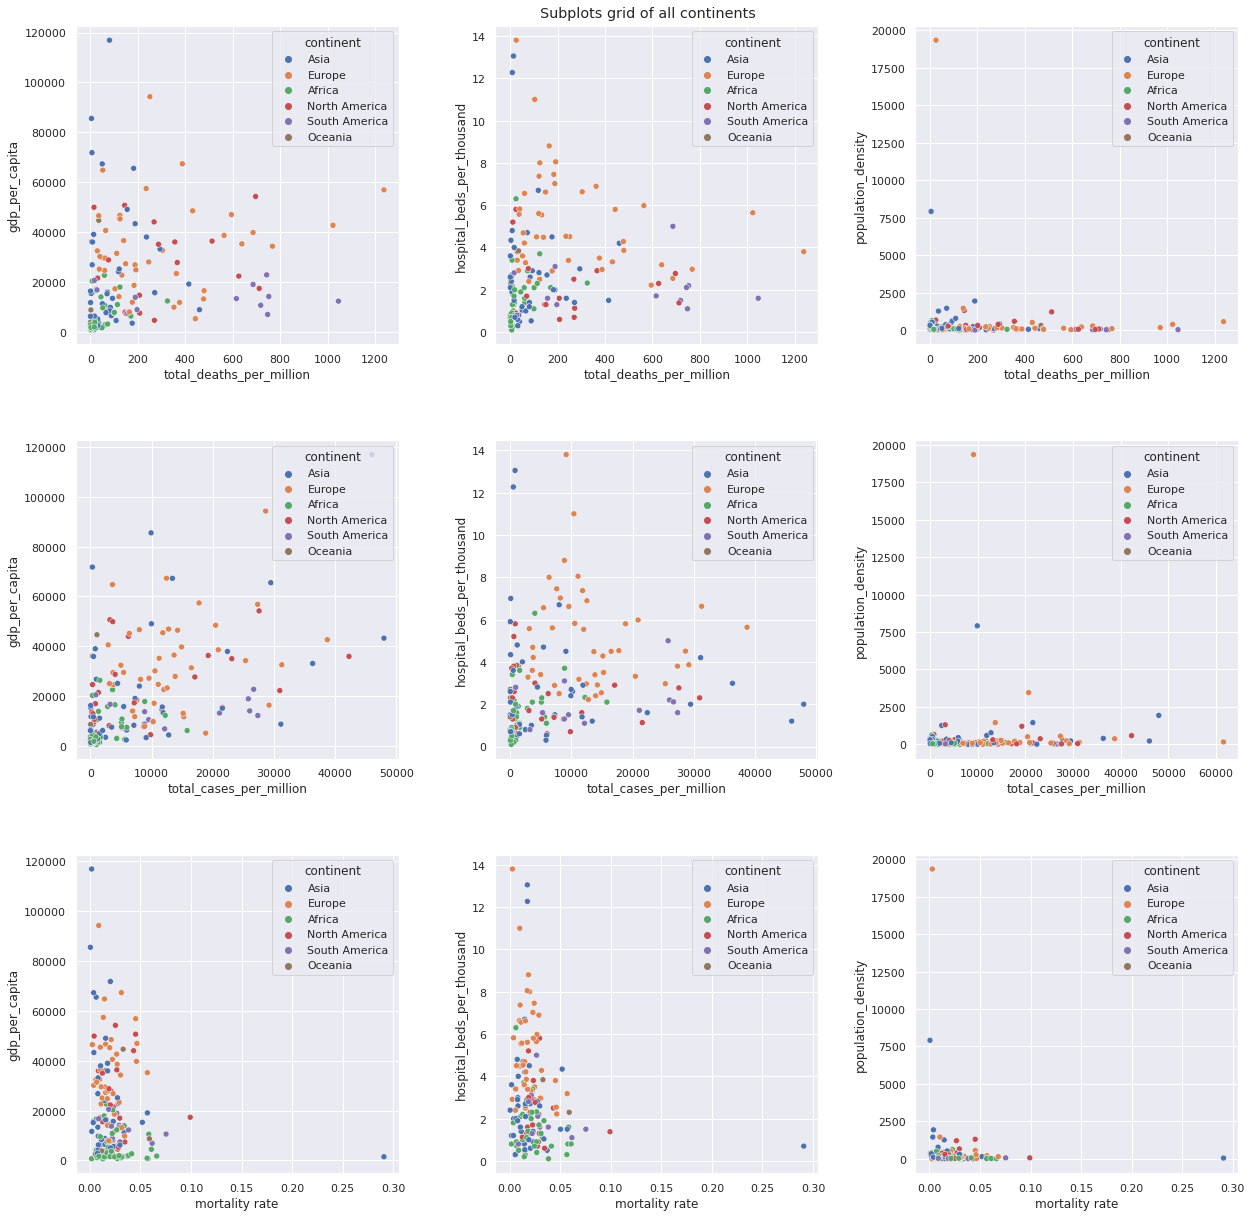

In [124]:
#scatter plots for each indicator-characteristic pair and continents
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(17,17))
plt.suptitle('Subplots grid of all continents')
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

count=0
for x in indicators :
    for y in characteristics:
        count=count+1
        if count>=7 and count <=9:
            plt.subplot(3, 3, count) 
            plt.xlabel('mortality rate')
            sns.scatterplot(data=specific_date,x=x,y=y,hue='continent') 
        else:
            plt.subplot(3, 3, count)     
            sns.scatterplot(data=specific_date,x=x,y=y,hue='continent') 

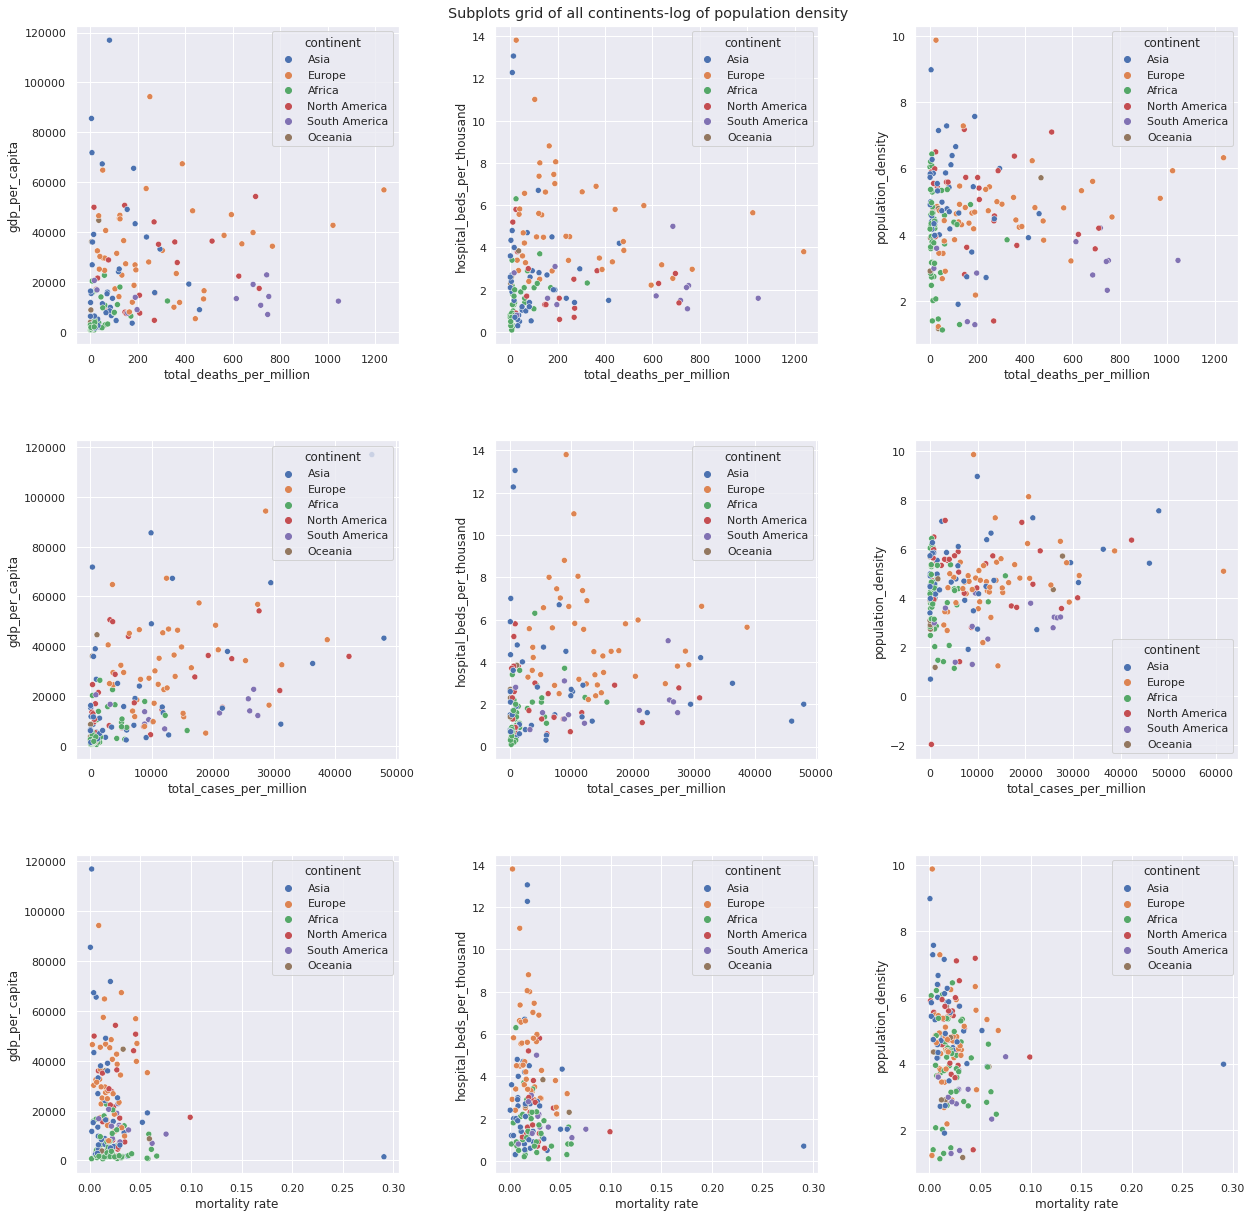

In [125]:
#calculate with log of population density 
#scatter plots for each indicator-characteristic pair and continents

fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(17,17))
plt.suptitle('Subplots grid of all continents-log of population density')
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

count=0
for x in indicators :
    for y in characteristics_log:
        count=count+1
        if count>=7 and count <=9:
            plt.subplot(3, 3, count) 
            plt.xlabel('mortality rate')
            sns.scatterplot(data=specific_date,x=x,y=y,hue='continent') 
        else:
            plt.subplot(3, 3, count)     
            sns.scatterplot(data=specific_date,x=x,y=y,hue='continent')

Παρατηρήσεις για όλες τις ηπείρους:

-Σε ό,τι αφορά τους θανάτους και τα κρούσματα ,περισσότεροι φαίνεται να καταγράφονται στις: Ευρώπη ,Νότια Αμερική και Βόρεια Αμερική και αισθητά λιγότεροι στις ασιατικές και αφρικανικές χώρες.Υπάρχει παρόμοια διασπορά στα κρεβάτια και στο ακαθάριστο προιόν.

-Η θνησιμότητα κρατείται σε χαμηλά επίπεδα ανεξάρτητα απο τον δείκτη.

-Η πυκνότητα πλυθυσμού δεν έπαιξε ιδιαίτερο ρόλο στις διασπορές.

-Oι Αφρικανικές χώρες έχουν μικρό αριθμό θανάτων,κρουσμάτων και θνησιμότητας,αλλα και μικρό ακαθάριστο προιόν,λίγα κρεβάτια και ελάχιστη πυκνότητα πληθυσμού.Η εγκυρότητα των τεστ,το πλήθος τους,οι διαγνωσμένοι θάνατοι από covid αλλά και η καταγραφή τους,είναι αμφίβολα για μια ήπειρο αρκετά ασθενέστερη από άλλες.

-Με την είσοδο του λογάριθμου στο γράφημα της πυκνότητας του πληθυσμού φαίνεται πως η διασπορά θανάτων αλλάζει με την Ευρώπη ,Νότια Αμερική και Βόρεια Αμερική να έχουν και πάλι περισσότερους θανάτους και κρούσματα από άλλες πολυπληθείς ηπείρους,χωρίς όμως να αλλάζει ρυθμό η θνησιμότητα.

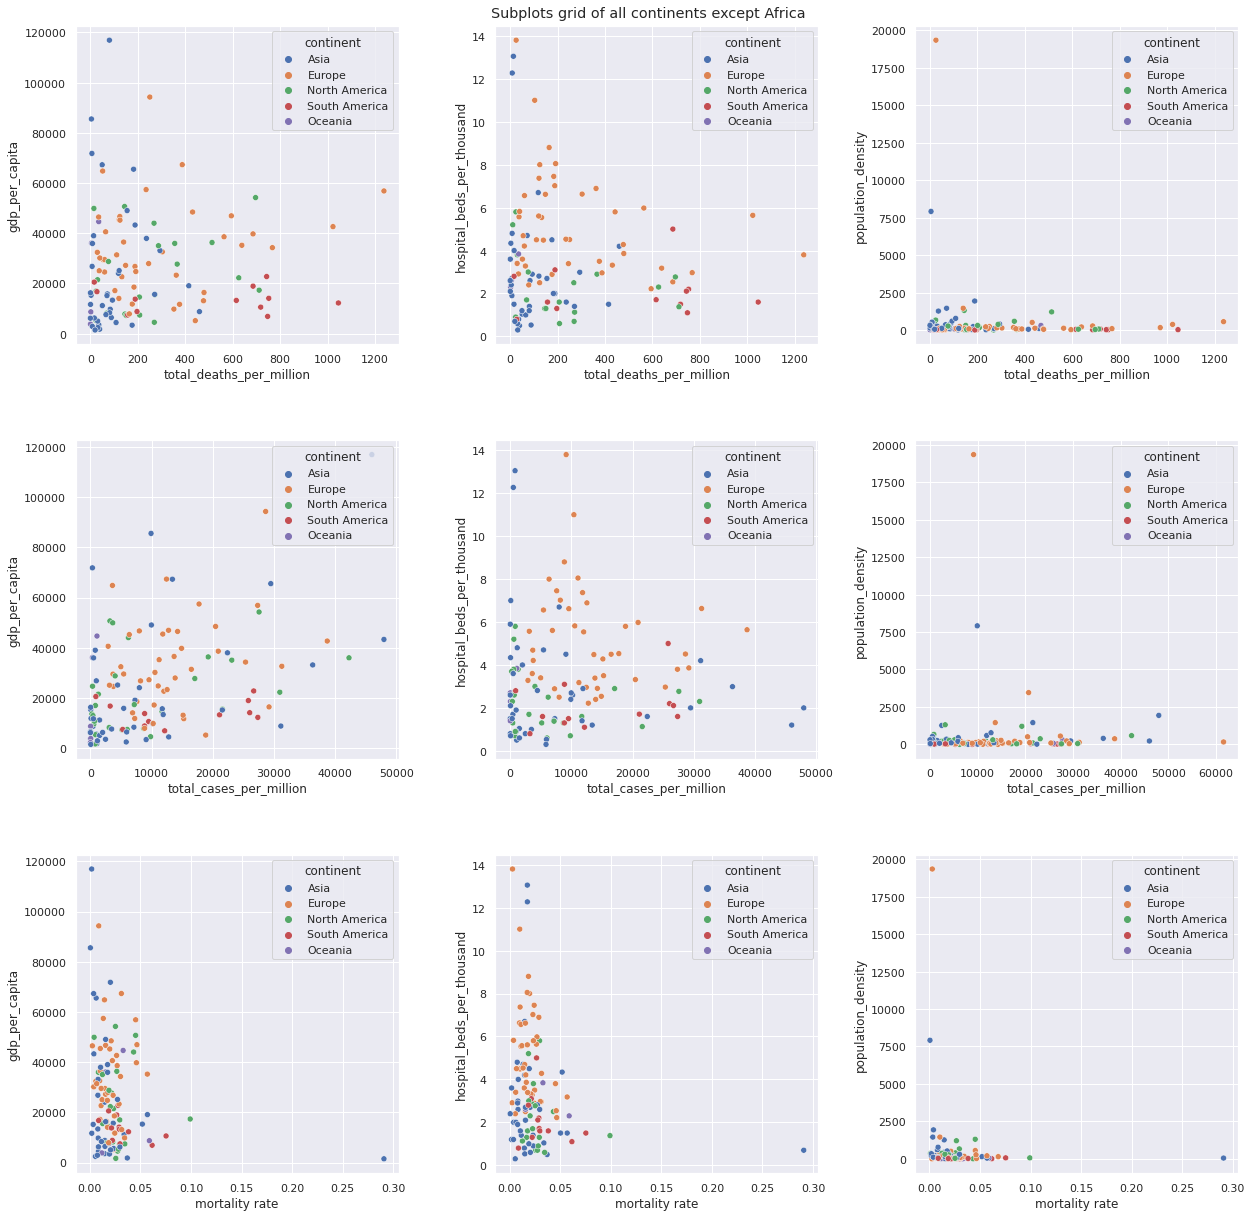

In [126]:
#scatter plots for each indicator-characteristic pair with Africa continent not included

fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(17,17))
plt.suptitle('Subplots grid of all continents except Africa')
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

count=0
for x in indicators_not_Africa:
    for y in characteristics_not_Africa :
        count=count+1
        if count>=7 and count <=9:
            plt.subplot(3, 3, count) 
            plt.xlabel('mortality rate')
            sns.scatterplot(data=not_Africa,x=x,y=y,hue='continent') 
        else:
            plt.subplot(3, 3, count)     
            sns.scatterplot(data=not_Africa,x=x,y=y,hue='continent')      
            

Οι παρατηρήσεις διατηρούνται για αυτό το σύνολο γραφικών παραστάσεων.

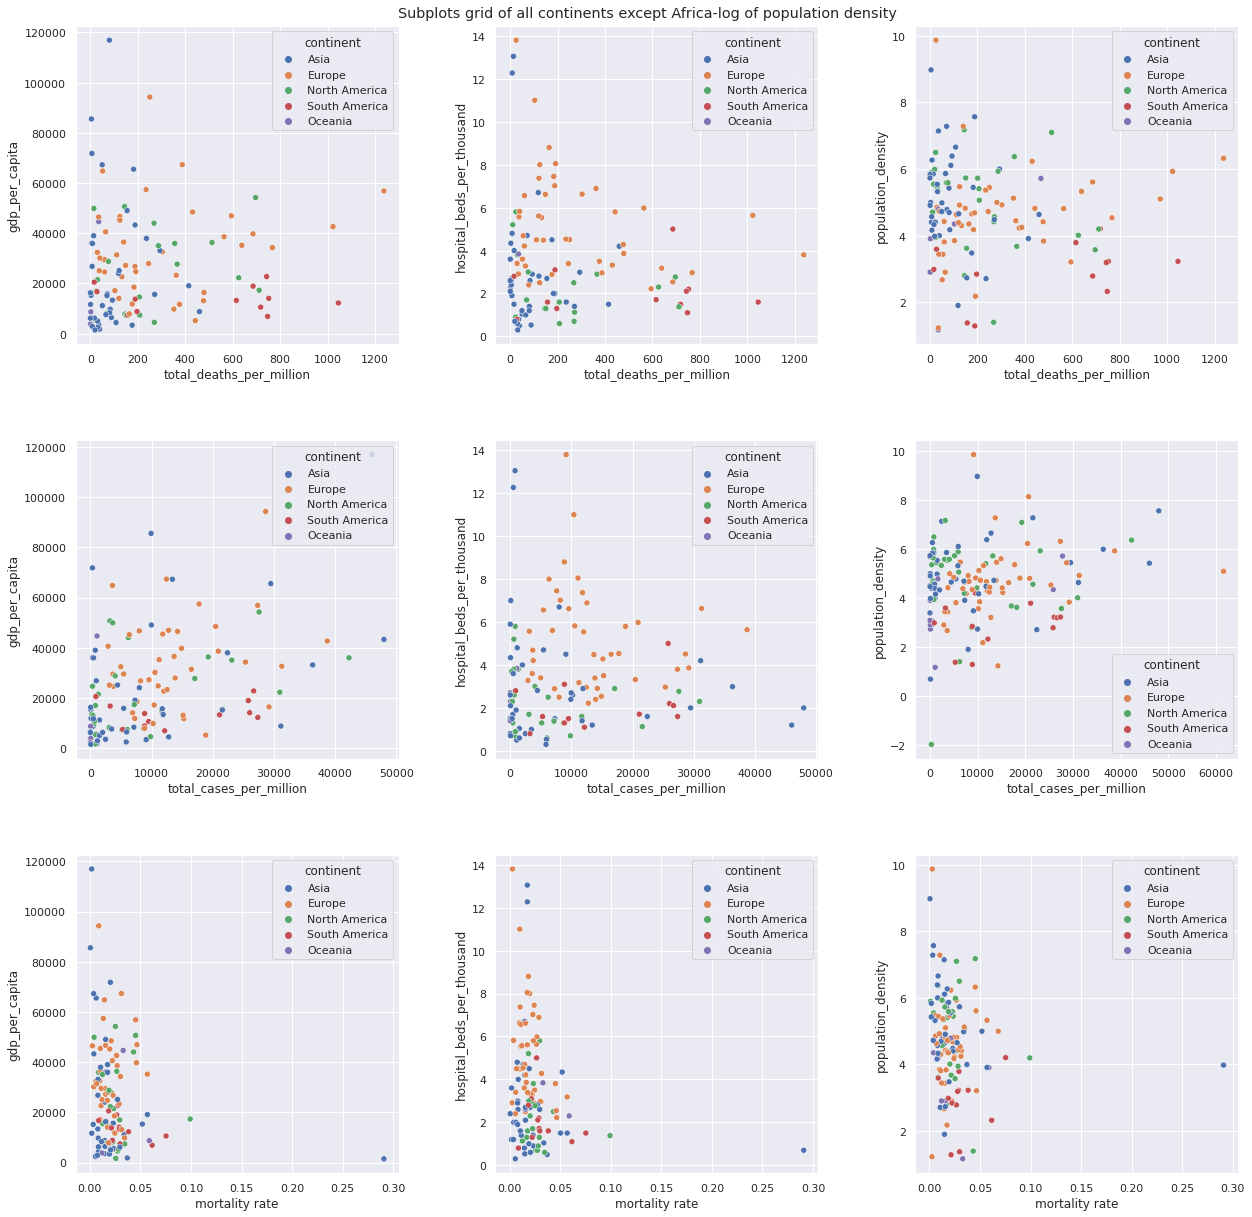

In [127]:
#scatter plots for each indicator-characteristic pair with Africa continent not included and with log of population density

fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(17,17))
plt.suptitle('Subplots grid of all continents except Africa-log of population density')
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

count=0
for x in indicators_not_Africa:
    for y in characteristics_log_not_Africa:
        count=count+1
        if count>=7 and count <=9:
            plt.subplot(3, 3, count) 
            plt.xlabel('mortality rate')
            sns.scatterplot(data=not_Africa,x=x,y=y,hue='continent') 
        else:
            plt.subplot(3, 3, count)     
            sns.scatterplot(data=not_Africa,x=x,y=y,hue='continent') 

Παρατηρήσεις :

-Η Ευρώπη έχει τους περισσότερους θανάτους έχοντας μεγάλη αντίθεση με την Ασία που παρόλο που έιναι γενικά πιο ασθενής οικονομικά,με λιγότερα κρεβάτια ανά χιλιάδα και μεγαλύτερη πυκνότητα πληθυσμού.

-Τα κρούσματα ακολουθούν το μοτίβο των θανάτων .

-Ο ρυθμός θνησιμότητας δεν παρουσιάζει ιδιαίτερη μεταβολή.


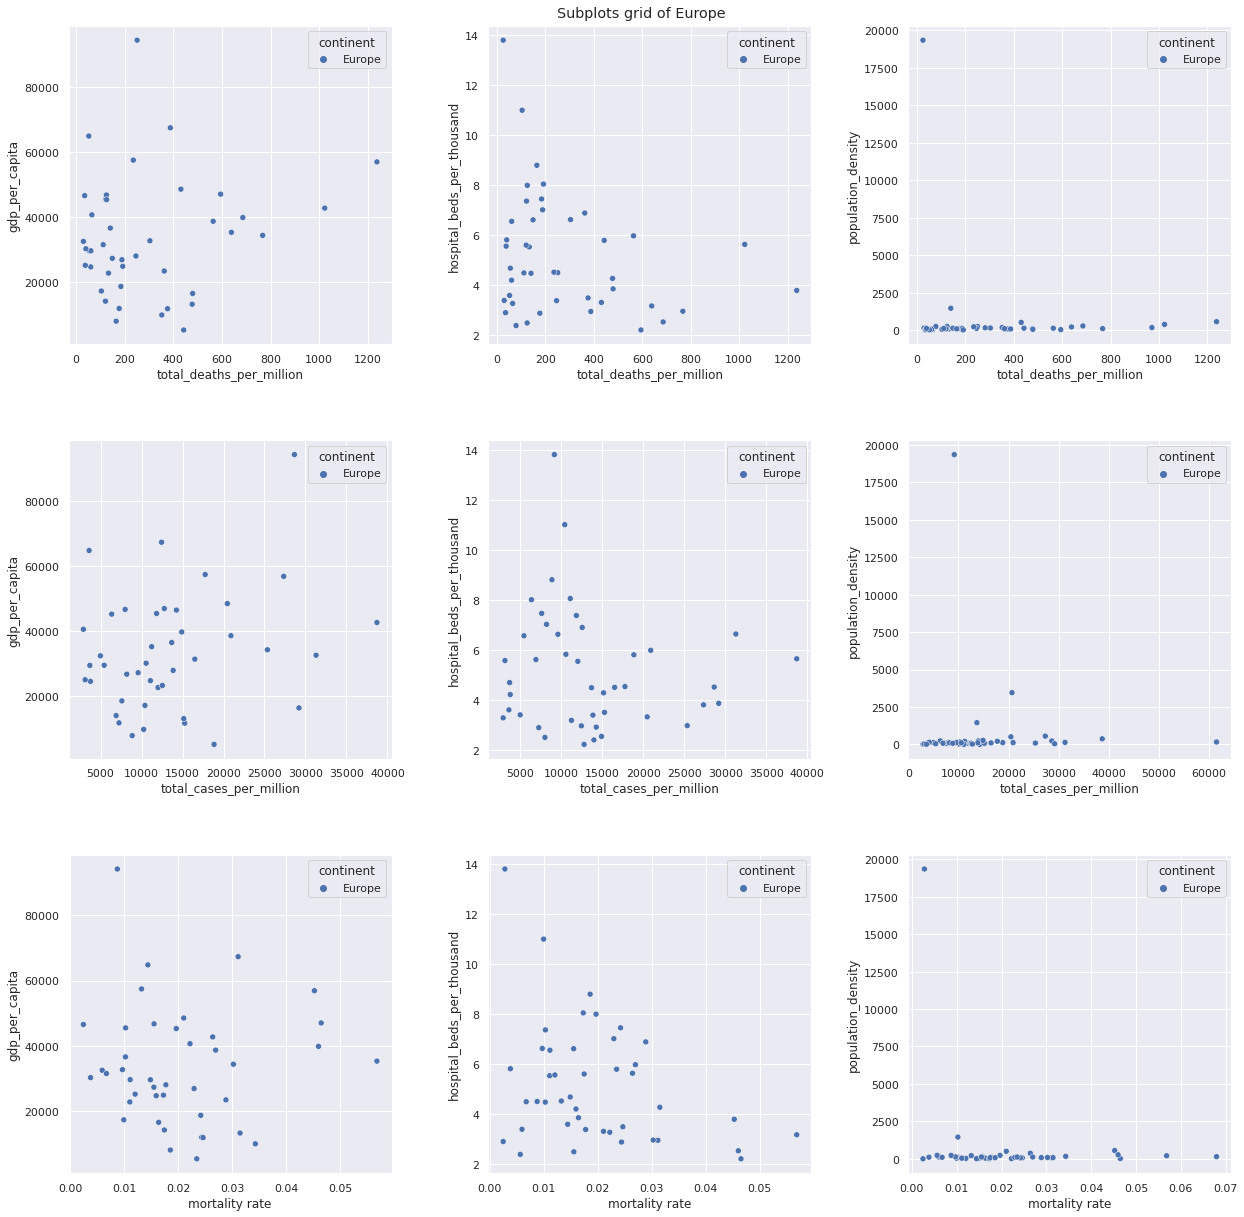

In [128]:
#scatter plots for each indicator-characteristic pair about Europe only
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(17,17))
plt.suptitle('Subplots grid of Europe')
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

count=0
for x in indicators_only_Europe:
    for y in characteristics_only_Europe:
        count=count+1
        if count>=7 and count <=9:
            plt.subplot(3, 3, count) 
            plt.xlabel('mortality rate')
            sns.scatterplot(data=only_Europe,x=x,y=y,hue='continent') 
        else:
            plt.subplot(3, 3, count)     
            sns.scatterplot(data=only_Europe,x=x,y=y,hue='continent')  



Παρατηρήσεις για την Ευρώπη:


-Για τους συνολικούς θανάτους ,παρατηρείται πως οι χώρες με χαμηλό ή πολύ υψηλό ακαθάριστο προιόν έχουν και χαμηλότερο ποσοστό θανάτων κατα γενική εικόνα από τις χώρες με μέσο.Όσα περισσότερα είναι τα κρεβάτια νοσοκομείου ανά χιλιάδα,τόσο λιγότεροι οι θάνατοι με τις χώρες που έχουν πάνω απο 6 να καταφράφουν λιγότερους απο 200 θανάτους ανά εκατομμύριο.Καμία επιρροή δεν φαίνεται να έχει η πυκνότητα πληθυσμού στους θανάτους,όπως φαίνεται απο την διασπορά στο γράφημα όπου οι θάνατοι είναι ιδιαίτερα αυξημένοι σε χώρες με πολύ χαμηλή πυκνότητα.

-Για τον αριθμό των κρουσμάτων,παρατηρείται πως όσο μικρότερο το ακαθάριστο προιόν τόσο λιγότερα τα κρούσματα,ενδεχομένως γιατί τα τεστ που διατίθενται είναι ακριβά άρα και λιγότερα σε αριθμό,ώστε να ανιχνευθεί ρεαλιστικός αριθμός κρουσμάτων.Παρόμοιο μοτίβο φαίνεται και στην περίπτωση των κρεβατιών ,καθώς χώρες που έχουν λιγότερα κρεβάτια εμφανίζουν και μικρό αριθμό κρουσμάτων ,κατι που επαφίεται στην οικονομική κατάσταση των χωρών,ενώ οι πλουσιότερες έχουν μεγάλο αριθμό κρεβατιών και λιγότερα κρούσματα.Η πυκνότητα του πληθυσμού δεν επηρεάζει ιδιαίτερα τα αποτελέσματα καθώς η συγκέντρωση φτάνει,για αρκετάμικρη πυκνότητα από 0-30000 κρούσματα.

-Η θνησιμότητα είναι ένας παράγοντας που δεν επηρεάζεται καθοριστικά από το ακαθάριστο προιόν καθότι και πιο πλούσιες χώρες φαίνεται να έχουν παρόμοια ποσοστά με αυτά ασθενέστερων,οικονομικά,χωρών.Τα κρεβάτια μειώνουν το ποσοστό θνησιμότητας,ενώ ξανά,η πυκνότητα πληθυσμού δεν επηρεάζει το μέσο όρο θανάτων.

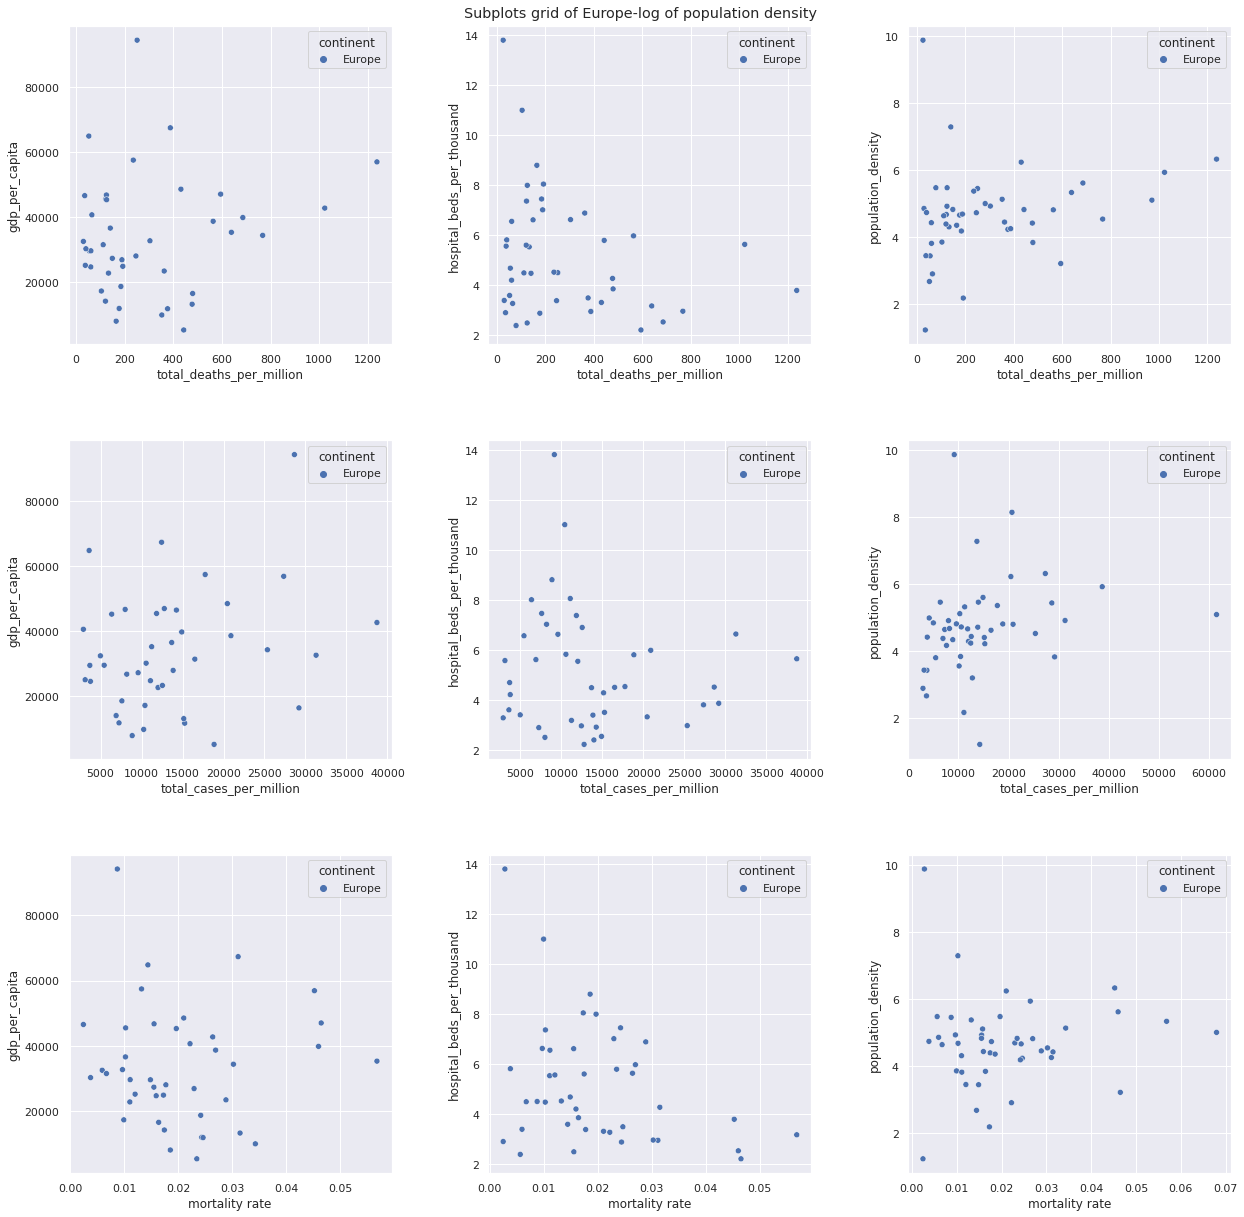

In [129]:
#scatter plots for each indicator-characteristic pair about Europe only with log of population density

fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(17,17))
plt.suptitle('Subplots grid of Europe-log of population density')
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

count=0
for x in indicators_only_Europe:
    for y in characteristics_log_only_Europe:
        count=count+1
        if count>=7 and count <=9:
            plt.subplot(3, 3, count) 
            plt.xlabel('mortality rate')
            sns.scatterplot(data=only_Europe,x=x,y=y,hue='continent') 
        else:
            plt.subplot(3, 3, count)     
            sns.scatterplot(data=only_Europe,x=x,y=y,hue='continent')  


Παρατηρήσεις:

-Με τον λογάριθμο για την πυκνότητα του πληθυσμου,τα κρούσματα,οι θάνατοι και ο ρυθμός θνησιμότητας έχουν περίπου την ίδια διασπορά.

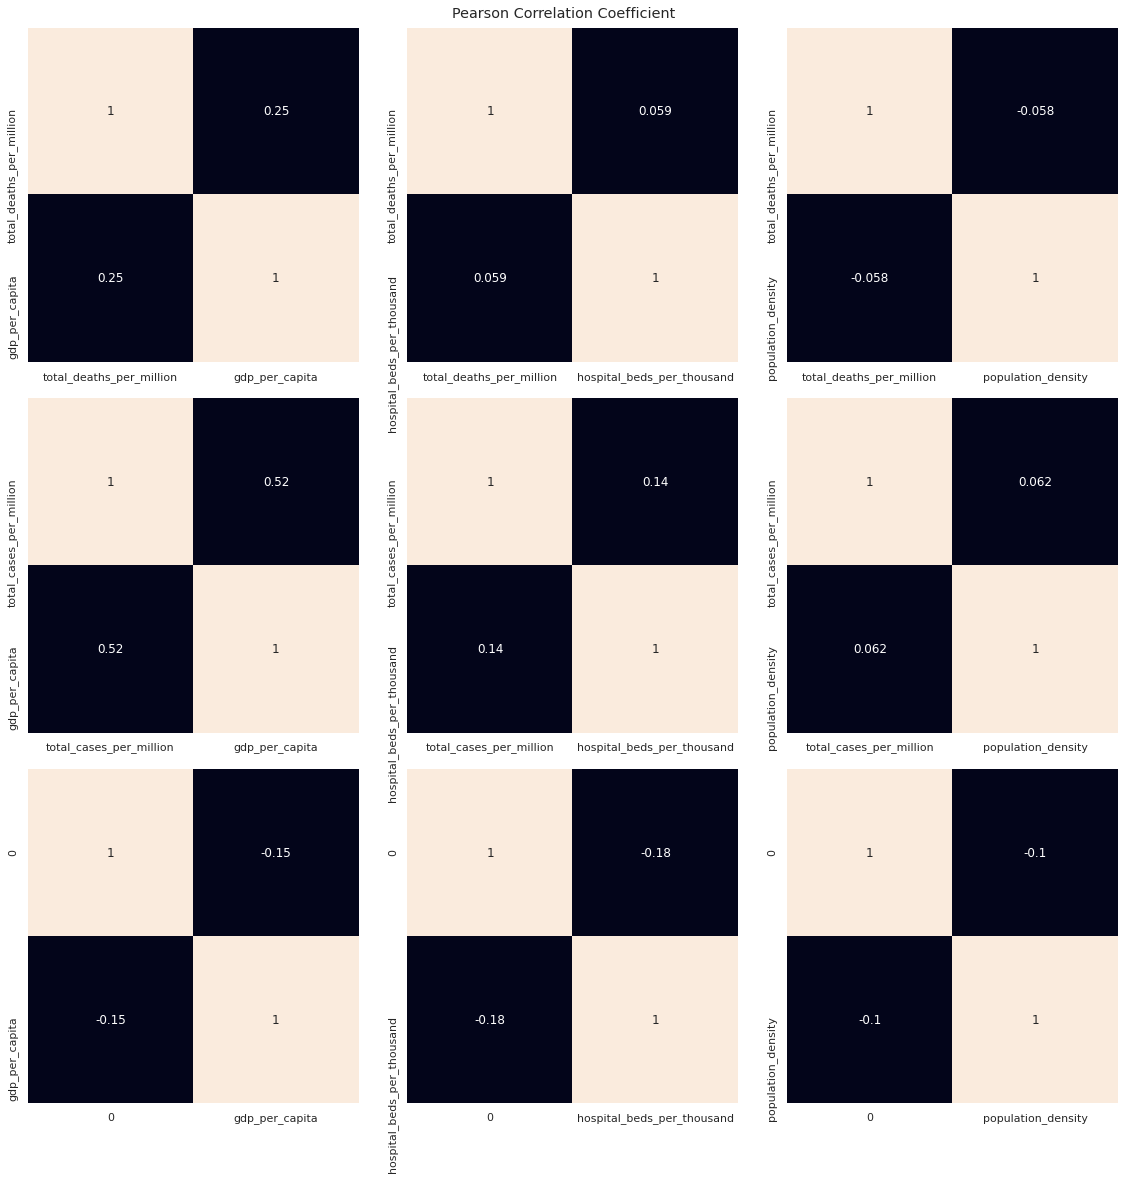

In [130]:
#Pearson Correlation Coefficient heatmap plots for indicator-characteristic pairs and all continents
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(16,16))
plt.suptitle('Pearson Correlation Coefficient')
fig.tight_layout()

count=0
for x in indicators:
    for y in characteristics:
            count=count+1
            needed_data= pd.concat([pd.DataFrame(x), pd.DataFrame(y)],axis=1)
            needed_data.dropna(inplace=True)
            cor=needed_data.corr(method = 'pearson')
            plt.subplot(3, 3, count) 
            sns.heatmap(cor, annot=True,cbar=False)

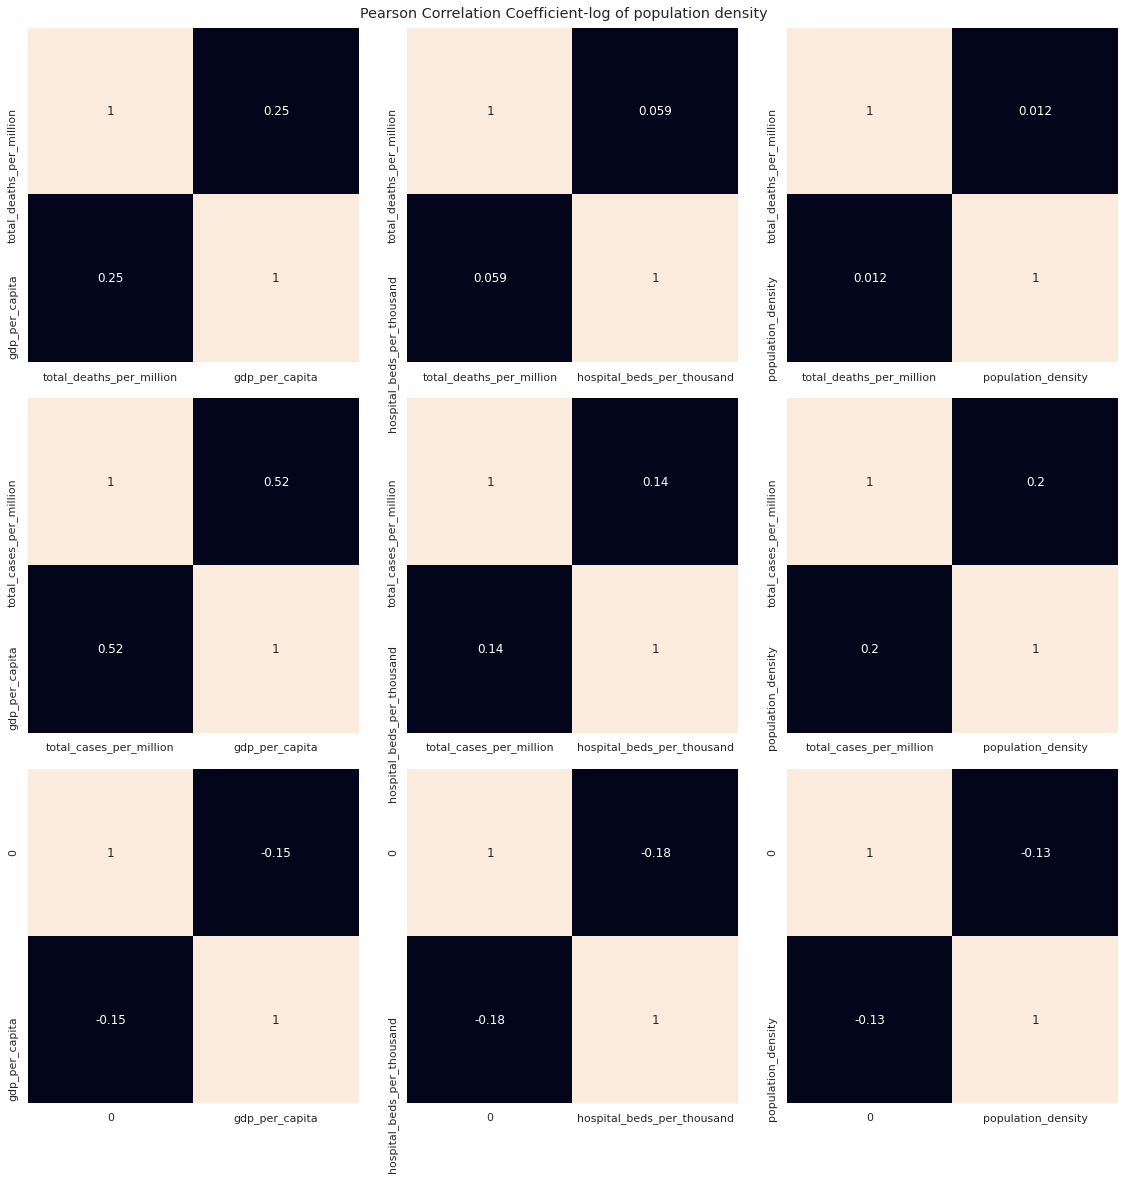

In [131]:
#Pearson Correlation Coefficient heatmap plots for indicator-characteristic pairs and all continents with log of population density
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(16,16))
plt.suptitle('Pearson Correlation Coefficient-log of population density')
fig.tight_layout()

count=0
for x in indicators:
    for y in characteristics_log:
            count=count+1
            needed_data= pd.concat([pd.DataFrame(x), pd.DataFrame(y)],axis=1)
            needed_data.dropna(inplace=True)
            cor=needed_data.corr(method = 'pearson')
            plt.subplot(3, 3, count) 
            sns.heatmap(cor, annot=True,cbar=False)

Παρατηρήσεις για όλες τις ηπείρους σε σχέση με το correlation:

-Στις μετρήσεις φαίνεται γενικά μια αναλογία μεταξύ κρουσμάτων και θανάτων με κρεβάτια και ακαθάριστο προιόν.

-Ο ρυθμός θνησιμότητας είναι αντιστρόφος ανάλογος των 3 χαρακτηριστικών.

-Ο πλούτος μιας ηπείρου είναι ανάλογος των κρουσμάτων,ενδεχομένως δείχνει την ικανότητα να διαγιγνώσκουν κρούσματα και να παρέχουν τεστς.

-Η πληθυσμική πυκνότητα είναι αντίστροφα ανάλογη των θανάτων και του ρυθμού θνησιμότητας,ενώ όταν αντικαθίσταται με τον λογάριθμο της,εμφανίζει μικπη μεταβόλη σε αναλογία και πάλι αντιστροφή στον ρυθμό θνησιμότητας.

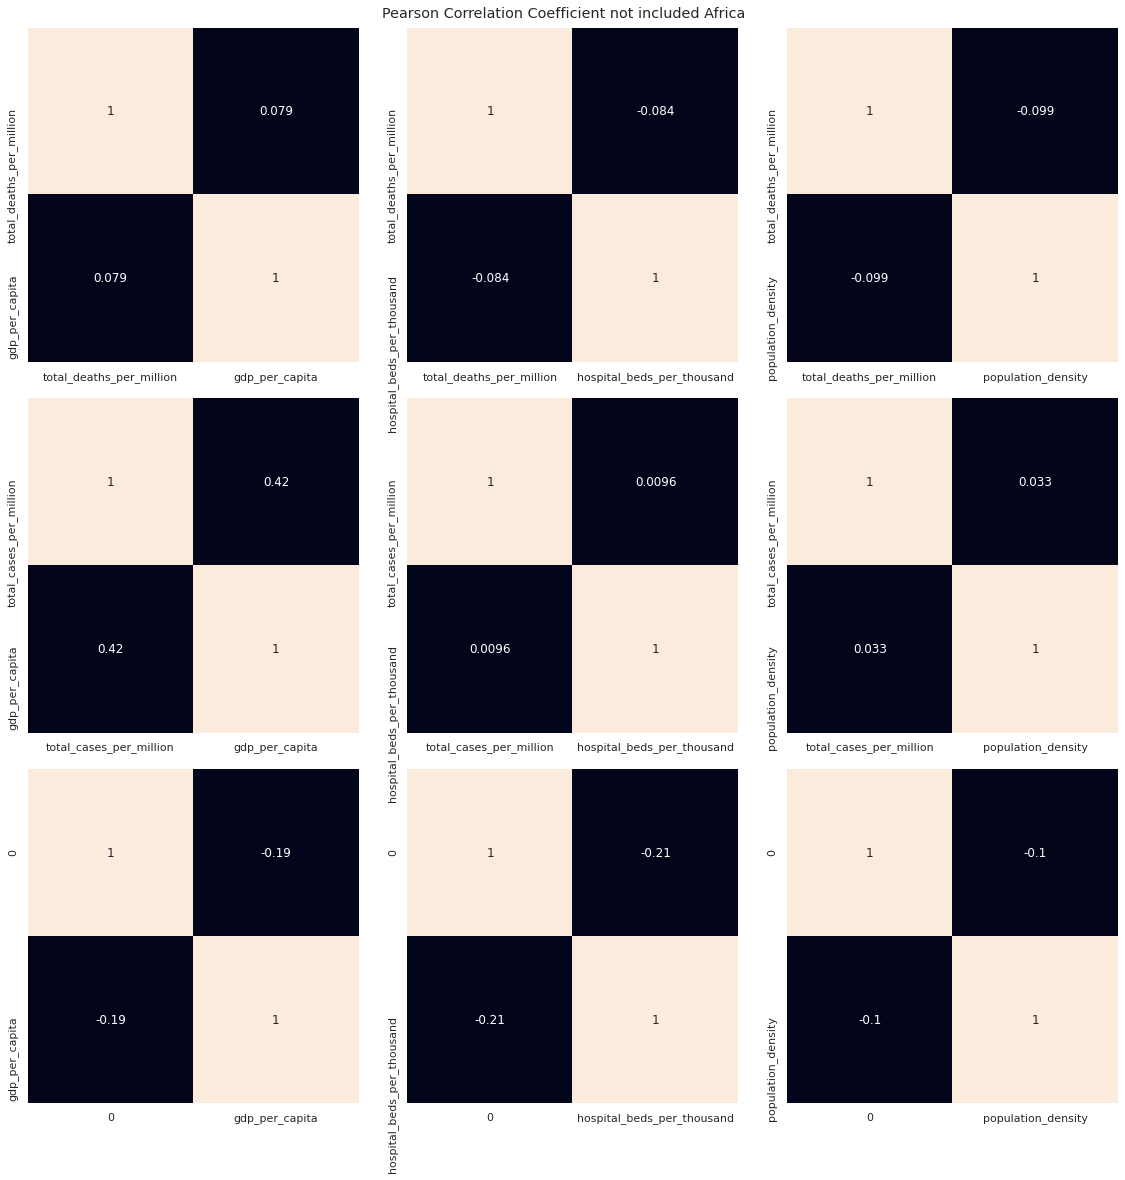

In [132]:
#Pearson Correlation Coefficient heatmap plots for indicator-characteristic pairs with Africa not included
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(16,16))
plt.suptitle('Pearson Correlation Coefficient not included Africa')
fig.tight_layout()

count=0
for x in indicators_not_Africa:
    for y in characteristics_not_Africa:
            count=count+1
            needed_data= pd.concat([pd.DataFrame(x), pd.DataFrame(y)],axis=1)
            needed_data.dropna(inplace=True)
            cor=needed_data.corr(method = 'pearson')
            plt.subplot(3, 3, count) 
            sns.heatmap(cor, annot=True,cbar=False)

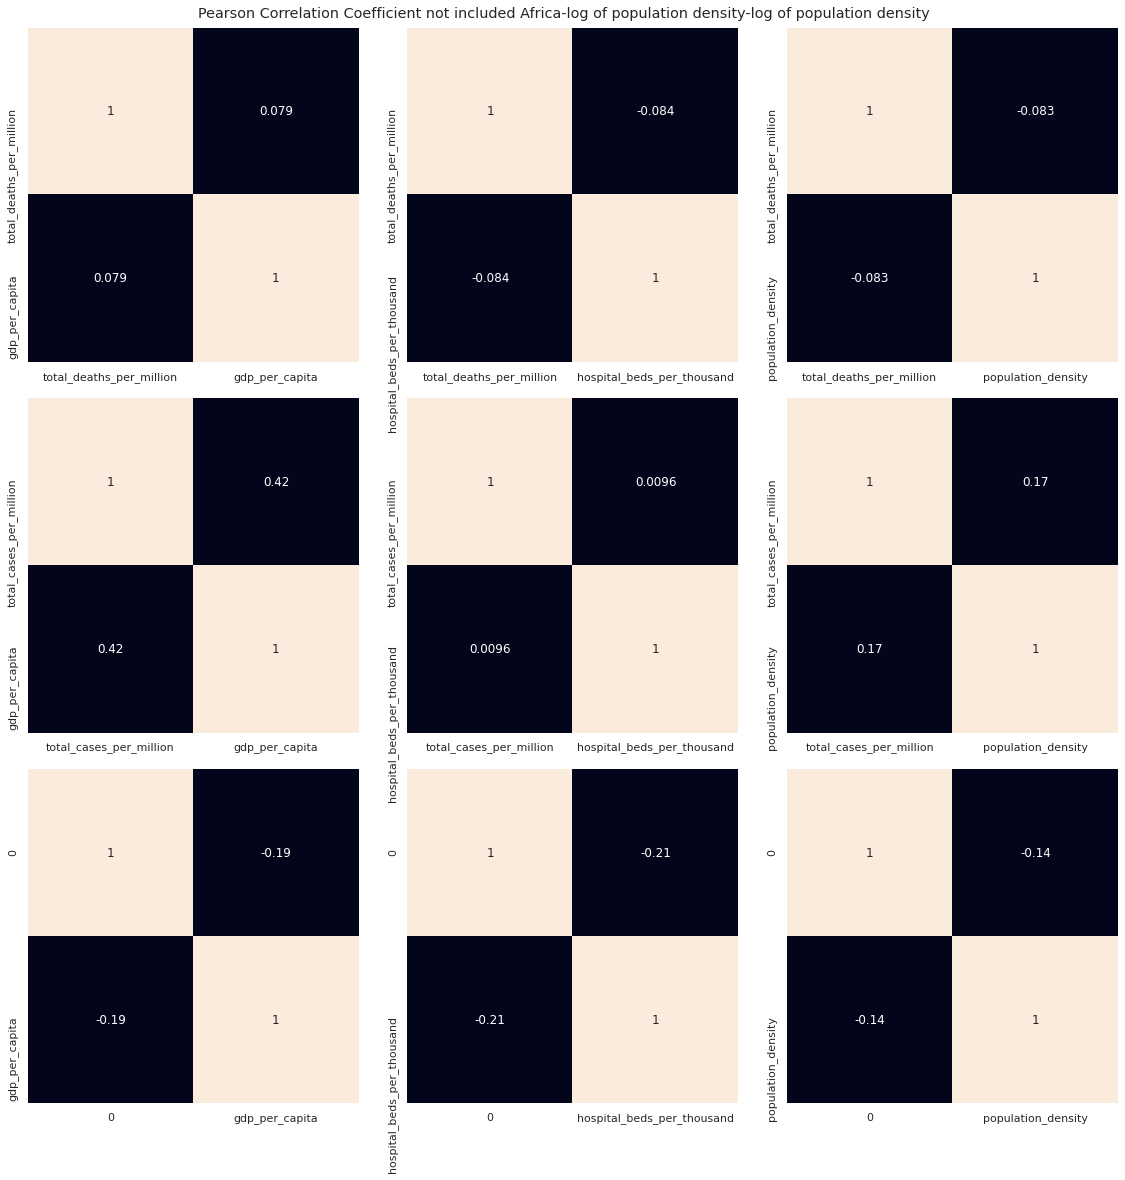

In [133]:
#Pearson Correlation Coefficient heatmap plots for indicator-characteristic pairs with Africa not included and log of population density
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(16,16))
plt.suptitle('Pearson Correlation Coefficient not included Africa-log of population density-log of population density')
fig.tight_layout()

count=0
for x in indicators_not_Africa:
    for y in characteristics_log_not_Africa:
            count=count+1
            needed_data= pd.concat([pd.DataFrame(x), pd.DataFrame(y)],axis=1)
            needed_data.dropna(inplace=True)
            cor=needed_data.corr(method = 'pearson')
            plt.subplot(3, 3, count) 
            sns.heatmap(cor, annot=True,cbar=False)

Παρατηρήσεις για την εξαίρεση της Αφρικής:

-Η αναλογία των θανάτων και των κρουσμάτων σε σχέση με την προηγούμενη περίπτωση είναι μικρότερη και ο λογάριθμος της πυκνότητας πληθυσμού δεν έφερε ισχυρές μεταβολές.


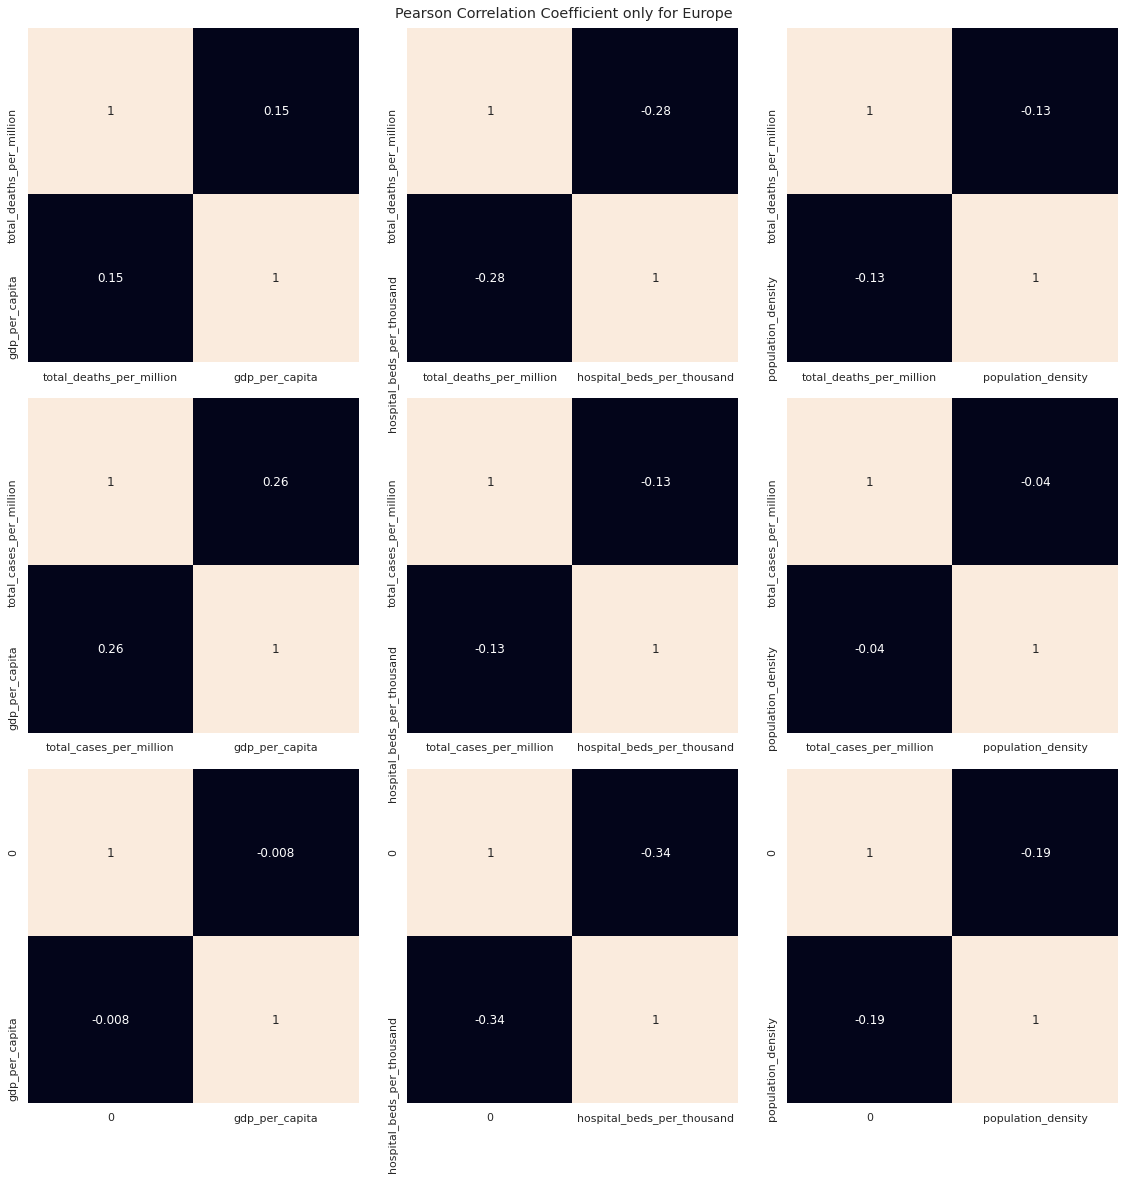

In [134]:
#Pearson Correlation Coefficient heatmap plots for indicator-characteristic pairs only for Europe
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(16,16))
plt.suptitle('Pearson Correlation Coefficient only for Europe')
fig.tight_layout()

count=0
for x in indicators_only_Europe:
    for y in characteristics_only_Europe:
            count=count+1
            needed_data= pd.concat([pd.DataFrame(x), pd.DataFrame(y)],axis=1)
            needed_data.dropna(inplace=True)
            cor=needed_data.corr(method = 'pearson')
            plt.subplot(3, 3, count) 
            sns.heatmap(cor, annot=True,cbar=False)

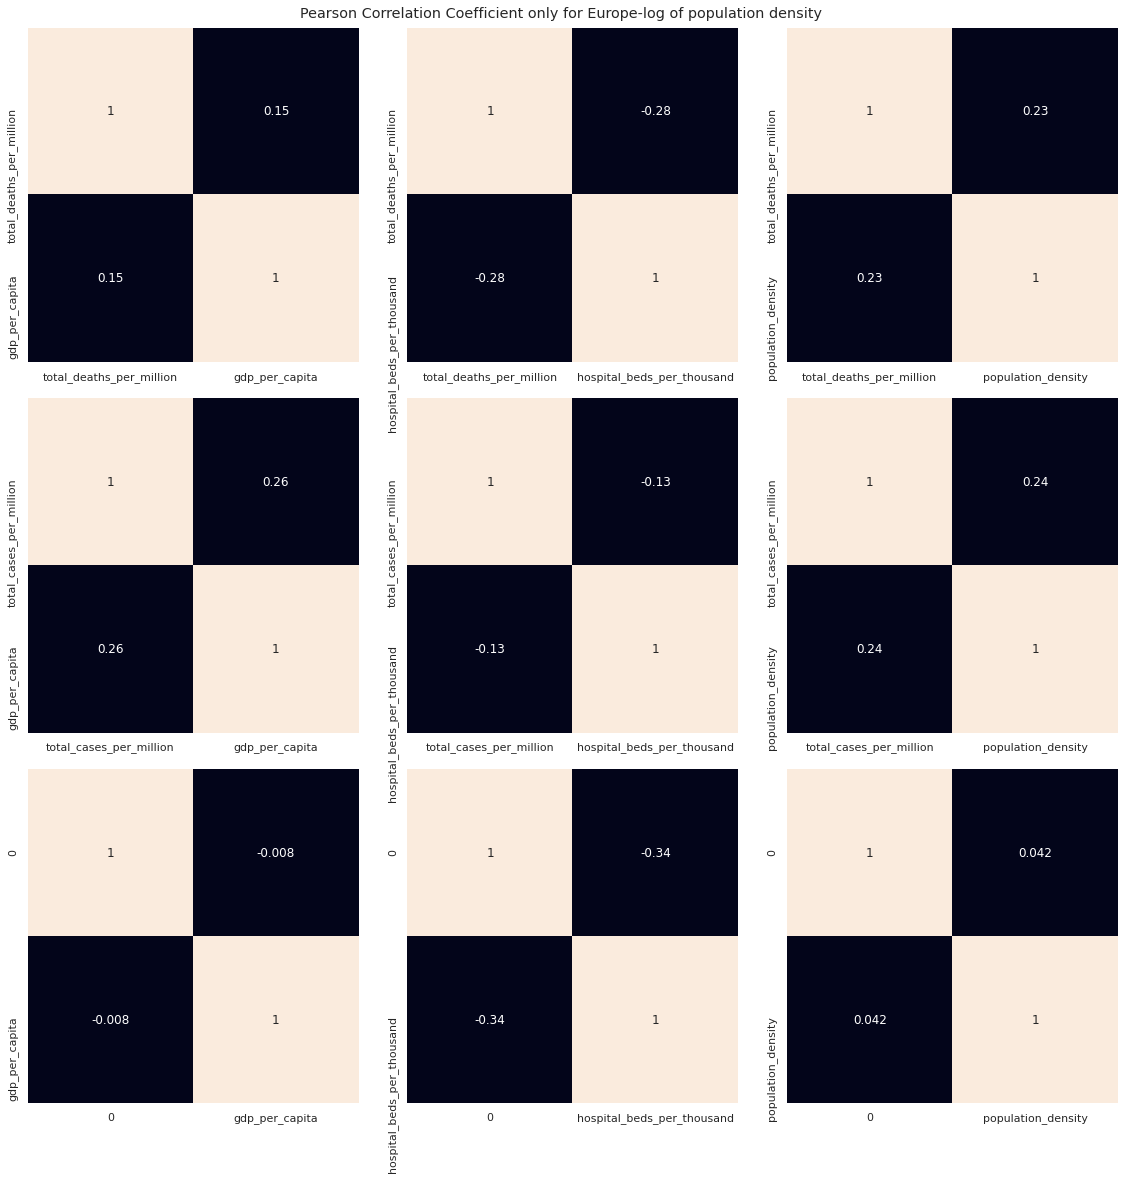

In [135]:
#Pearson Correlation Coefficient heatmap plots for indicator-characteristic pairs only for Europe with log of population density 
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(16,16))
plt.suptitle('Pearson Correlation Coefficient only for Europe-log of population density ')
fig.tight_layout()

count=0
for x in indicators_only_Europe:
    for y in characteristics_log_only_Europe:
            count=count+1
            needed_data= pd.concat([pd.DataFrame(x), pd.DataFrame(y)],axis=1)
            needed_data.dropna(inplace=True)
            cor=needed_data.corr(method = 'pearson')
            plt.subplot(3, 3, count) 
            sns.heatmap(cor, annot=True,cbar=False)

Παρατηρήσεις για την Ευρώπη:

-Με εξαίρεση τα κρούσματα και τους θανάτους σε σχέση με το ακαθάριστο προιόν,που έιναι ανάλογα,όλα τα υπόλοιπα είναι αντιστρόφως ανάλογα.

-Με την είσοδο του λογαρίθμου της πληθυσμιακής πυκνότητας,ό,τι σχετίζεται με αυτήν γίνεται ανάλογο.

P-value tests for all continents for each pair of indicator and characteristic.

In [136]:
#z-tests sample for all continents
print('P-value tests for all continents\n')

print('Hypothesis: Indicators are depend on characteristics.\n ')

indicators_names=['total_deaths_per_million','total_cases_per_million','mortality_rate']
characteristics_names=['gdp_per_capita','hospital_beds_per_thousand','population_density']

counti=-1
countc=-1
for x in indicators:
    counti+=1
    countc=-1
    for y in characteristics:
        countc+=1
        ztest, pvalue = stests.ztest(x.dropna(),y.dropna())

        if pvalue<0.05:    
            print('\nReject Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

        else:    
            print('\nAccept Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )


P-value tests for all continents

Hypothesis: Indicators are depend on characteristics.
 

Reject Null Hypothesis of p-value: 7.246756419522333e-41 of total_deaths_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 1.6674884882620386e-20 of total_deaths_per_million and hospital_beds_per_thousand

Accept Null Hypothesis of p-value: 0.10096033453464887 of total_deaths_per_million and population_density

Reject Null Hypothesis of p-value: 1.8135523850761276e-12 of total_cases_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 2.5777906083112153e-24 of total_cases_per_million and hospital_beds_per_thousand

Reject Null Hypothesis of p-value: 2.874401314675824e-26 of total_cases_per_million and population_density

Reject Null Hypothesis of p-value: 1.423124784589617e-41 of mortality_rate and gdp_per_capita

Reject Null Hypothesis of p-value: 1.8770254168649512e-63 of mortality_rate and hospital_beds_per_thousand

Reject Null Hypothesis of p-value: 0.001565629

In [137]:
#z-tests sample for all continents with log of population density
print('P-value tests for all continents with log of population density\n')

print('Hypothesis: Indicators are depend on characteristics.\n ')


counti=-1
countc=-1
for x in indicators:
    counti+=1
    countc=-1
    for y in characteristics_log:
        countc+=1
        ztest, pvalue = stests.ztest(x.dropna(),y.dropna())

        if pvalue<0.05:    
            print('\nReject Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

        else:    
            print('\nAccept Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

P-value tests for all continents with log of population density

Hypothesis: Indicators are depend on characteristics.
 

Reject Null Hypothesis of p-value: 7.246756419522333e-41 of total_deaths_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 1.6674884882620386e-20 of total_deaths_per_million and hospital_beds_per_thousand

Reject Null Hypothesis of p-value: 4.3677459078290845e-24 of total_deaths_per_million and population_density

Reject Null Hypothesis of p-value: 1.8135523850761276e-12 of total_cases_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 2.5777906083112153e-24 of total_cases_per_million and hospital_beds_per_thousand

Reject Null Hypothesis of p-value: 4.536678442411457e-29 of total_cases_per_million and population_density

Reject Null Hypothesis of p-value: 1.423124784589617e-41 of mortality_rate and gdp_per_capita

Reject Null Hypothesis of p-value: 1.8770254168649512e-63 of mortality_rate and hospital_beds_per_thousand

Reject Null 

In [138]:
#z-tests sample for all continents except Africa
print('P-value tests for all continents except Africa \n')

print('Hypothesis: Indicators are depend on characteristics.\n ')

counti=-1
countc=-1
for x in indicators_not_Africa:
    counti+=1
    countc=-1
    for y in characteristics_not_Africa:
        countc+=1
        ztest, pvalue = stests.ztest(x.dropna(),y.dropna())

        if pvalue<0.05:    
            print('\nReject Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

        else:    
            print('\nAccept Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

P-value tests for all continents except Africa 

Hypothesis: Indicators are depend on characteristics.
 

Reject Null Hypothesis of p-value: 9.35257011618539e-45 of total_deaths_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 1.3422202838945603e-22 of total_deaths_per_million and hospital_beds_per_thousand

Accept Null Hypothesis of p-value: 0.14778868638019507 of total_deaths_per_million and population_density

Reject Null Hypothesis of p-value: 7.280905569274693e-14 of total_cases_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 9.091338229246537e-26 of total_cases_per_million and hospital_beds_per_thousand

Reject Null Hypothesis of p-value: 5.338470256532601e-27 of total_cases_per_million and population_density

Reject Null Hypothesis of p-value: 1.5102032148210246e-45 of mortality_rate and gdp_per_capita

Reject Null Hypothesis of p-value: 7.591263209899982e-57 of mortality_rate and hospital_beds_per_thousand

Reject Null Hypothesis of p-value:

In [139]:
#z-tests sample for all continents except Africa with log of population density
print('P-value tests for all continents except Africa with log of population density\n')

print('Hypothesis: Indicators are depend on characteristics.\n ')

counti=-1
countc=-1
for x in indicators_not_Africa:
    counti+=1
    countc=-1
    for y in characteristics_log_not_Africa:
        countc+=1
        ztest, pvalue = stests.ztest(x.dropna(),y.dropna())

        if pvalue<0.05:    
            print('\nReject Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

        else:    
            print('\nAccept Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

P-value tests for all continents except Africa with log of population density

Hypothesis: Indicators are depend on characteristics.
 

Reject Null Hypothesis of p-value: 9.35257011618539e-45 of total_deaths_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 1.3422202838945603e-22 of total_deaths_per_million and hospital_beds_per_thousand

Reject Null Hypothesis of p-value: 5.409556589475373e-26 of total_deaths_per_million and population_density

Reject Null Hypothesis of p-value: 7.280905569274693e-14 of total_cases_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 9.091338229246537e-26 of total_cases_per_million and hospital_beds_per_thousand

Reject Null Hypothesis of p-value: 5.928516063719135e-30 of total_cases_per_million and population_density

Reject Null Hypothesis of p-value: 1.5102032148210246e-45 of mortality_rate and gdp_per_capita

Reject Null Hypothesis of p-value: 7.591263209899982e-57 of mortality_rate and hospital_beds_per_thousand

Re

In [140]:
#z-tests sample only for Europe
print('P-value tests only for Europe \n')

print('Hypothesis: Indicators are depend on characteristics.\n ')

counti=-1
countc=-1
for x in indicators_only_Europe:
    counti+=1
    countc=-1
    for y in characteristics_only_Europe:
        countc+=1
        ztest, pvalue = stests.ztest(x.dropna(),y.dropna())

        if pvalue<0.05:    
            print('\nReject Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

        else:    
            print('\nAccept Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

P-value tests only for Europe 

Hypothesis: Indicators are depend on characteristics.
 

Reject Null Hypothesis of p-value: 4.931617331131272e-37 of total_deaths_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 9.838970471613314e-12 of total_deaths_per_million and hospital_beds_per_thousand

Accept Null Hypothesis of p-value: 0.4165077208353223 of total_deaths_per_million and population_density

Reject Null Hypothesis of p-value: 2.87146285375929e-10 of total_cases_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 4.274824318173511e-18 of total_cases_per_million and hospital_beds_per_thousand

Reject Null Hypothesis of p-value: 1.8694192801117105e-17 of total_cases_per_million and population_density

Reject Null Hypothesis of p-value: 1.1189462189893986e-37 of mortality_rate and gdp_per_capita

Reject Null Hypothesis of p-value: 1.07407547173299e-49 of mortality_rate and hospital_beds_per_thousand

Accept Null Hypothesis of p-value: 0.1222079628902673

In [141]:
#z-tests sample only for Europe with log of population density
print('P-value tests only for Europe with log of population density \n')

print('Hypothesis: Indicators are depend on characteristics.\n ')

counti=-1
countc=-1
for x in indicators_only_Europe:
    counti+=1
    countc=-1
    for y in characteristics_log_only_Europe:
        countc+=1
        ztest, pvalue = stests.ztest(x.dropna(),y.dropna())

        if pvalue<0.05:    
            print('\nReject Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

        else:    
            print('\nAccept Null Hypothesis of p-value:',pvalue,"of "+indicators_names[counti]+' and '+characteristics_names[countc] )

P-value tests only for Europe with log of population density 

Hypothesis: Indicators are depend on characteristics.
 

Reject Null Hypothesis of p-value: 4.931617331131272e-37 of total_deaths_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 9.838970471613314e-12 of total_deaths_per_million and hospital_beds_per_thousand

Reject Null Hypothesis of p-value: 5.627610054162714e-13 of total_deaths_per_million and population_density

Reject Null Hypothesis of p-value: 2.87146285375929e-10 of total_cases_per_million and gdp_per_capita

Reject Null Hypothesis of p-value: 4.274824318173511e-18 of total_cases_per_million and hospital_beds_per_thousand

Reject Null Hypothesis of p-value: 4.8716415748001817e-20 of total_cases_per_million and population_density

Reject Null Hypothesis of p-value: 1.1189462189893986e-37 of mortality_rate and gdp_per_capita

Reject Null Hypothesis of p-value: 1.07407547173299e-49 of mortality_rate and hospital_beds_per_thousand

Reject Null Hypothe

Παρατηρήσεις για p-values:

-Σχεδόν όλα τα τέστ η υπόθεση απορρίπτεται και αυτό μας δείχνει ότι υπάρχει ουσιαστική διαφορά των δεικτών από τα χαρακτηριστικά.

-Ακόμη και με τον λογάριθμο η υπόθεση απορρίπτεται.

-Υπάρχουν αισθητές διαφορές στις τιμές ανάλογα με τις περιοχές τις οποίες αφορούν.

Part B

<AxesSubplot:xlabel='continent', ylabel='mortality rate'>

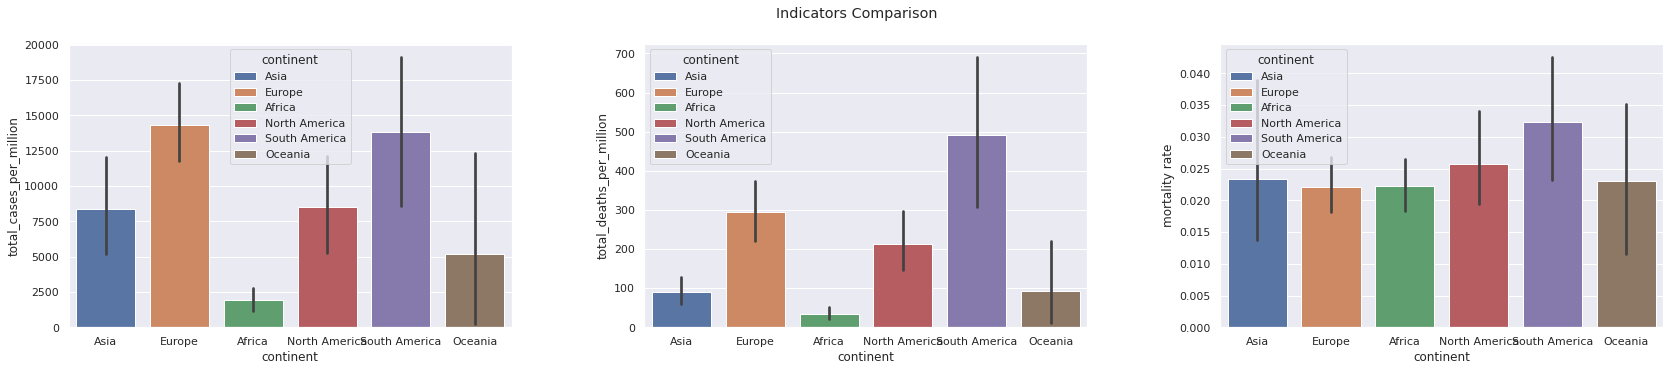

In [142]:
#bar plots for indicators comparison for each continent

fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(23,5))
plt.suptitle('Ιndicators Comparison')
fig.tight_layout()
plt.subplots_adjust(hspace=1,wspace=0.3)
plt.subplot(1,3,1) 
sns.barplot(x=specific_date.continent,y=specific_date.total_cases_per_million,hue='continent',data=specific_date, dodge=False)
plt.subplot(1,3,2) 
sns.barplot(x=specific_date.continent,y=specific_date.total_deaths_per_million,hue='continent',data=specific_date, dodge=False)

plt.subplot(1,3,3) 
plt.ylabel('mortality rate')
sns.barplot(x=specific_date.continent,y=mortality_rate,hue='continent',data=specific_date, dodge=False)


Παρατηρήσεις στο διάγραμμα μέσων των δεικτών για 1/11/2020:

-Η Ευρώπη είχε τα περισσότερα κρούσματα ,με την Αμερική να την ακολουθεί και την Αφρική να έιναι τελευταία.

-Η Αμερική έιναι πρώτη σε θανάτους,με την Ευρώπη να την διαδέχεται και την Αφρική να έχει κάτω απο 100 θανάτους.

-Ο ρυθμός θνησιμότητας είναι περίπου ίδιος για τις ηπείρους με μια απόκλιση για την Αμερική.

t-tests for pair of continents for 3 indicators

In [143]:
#t-test sample for Europe and Asia
print('t-tests only for Europe and Asia \n')

print("Hypothesis: There is no big difference between Asia's and Europe's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_Europe[i].dropna(),indicators_Asia[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for Europe and Asia 

Hypothesis: There is no big difference between Asia's and Europe's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value 0.0

Reject Null Hypothesis 

Indicator: total_cases_per_million
P-value 8.151601011261906e-77

Reject Null Hypothesis 

Indicator: mortality_rate
P-value 1.1121576846717153e-187

Reject Null Hypothesis 


In [144]:
#t-test sample for Europe and Oceania
print('t-tests only for Europe and Oceania \n')

print("Hypothesis: There is no big difference between Oceania's and Europe's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_Europe[i].dropna(),indicators_Oceania[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for Europe and Oceania 

Hypothesis: There is no big difference between Oceania's and Europe's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value 0.0

Reject Null Hypothesis 

Indicator: total_cases_per_million
P-value 7.175920505116955e-118

Reject Null Hypothesis 

Indicator: mortality_rate
P-value 3.955481915903402e-49

Reject Null Hypothesis 


In [145]:
#t-test sample for Europe and Africa
print('t-tests only for Europe and Africa \n')

print("Hypothesis: There is no big difference between Africa's and Europe's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_Europe[i].dropna(),indicators_Africa[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for Europe and Africa 

Hypothesis: There is no big difference between Africa's and Europe's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value 0.0

Reject Null Hypothesis 

Indicator: total_cases_per_million
P-value 0.0

Reject Null Hypothesis 

Indicator: mortality_rate
P-value 8.664792591286052e-125

Reject Null Hypothesis 


In [146]:
#t-test sample for Europe and NAmerica
print('t-tests only for Europe and NAmerica \n')

print("Hypothesis: There is no big difference between NAmerica's and Europe's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_Europe[i].dropna(),indicators_NAmerica[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for Europe and NAmerica 

Hypothesis: There is no big difference between NAmerica's and Europe's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value nan

Accept Null Hypothesis 

Indicator: total_cases_per_million
P-value nan

Accept Null Hypothesis 

Indicator: mortality_rate
P-value nan

Accept Null Hypothesis 


In [147]:
#t-test sample for Europe and SAmerica
print('t-tests only for Europe and SAmerica \n')

print("Hypothesis: There is no big difference between SAmerica's and Europe's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_Europe[i].dropna(),indicators_SAmerica[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for Europe and SAmerica 

Hypothesis: There is no big difference between SAmerica's and Europe's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value nan

Accept Null Hypothesis 

Indicator: total_cases_per_million
P-value nan

Accept Null Hypothesis 

Indicator: mortality_rate
P-value nan

Accept Null Hypothesis 


In [148]:
#t-test sample for Oceania and Asia
print('t-tests only for Oceania and Asia \n')

print("Hypothesis: There is no big difference between Asia's and Oceania's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_Oceania[i].dropna(),indicators_Asia[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for Oceania and Asia 

Hypothesis: There is no big difference between Asia's and Oceania's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value 0.935613241159859

Accept Null Hypothesis 

Indicator: total_cases_per_million
P-value 1.9632042332735207e-30

Reject Null Hypothesis 

Indicator: mortality_rate
P-value 0.0002429917434860612

Reject Null Hypothesis 


In [149]:
#t-test sample for Africa and Asia
print('t-tests only for Africa and Asia \n')

print("Hypothesis: There is no big difference between Asia's and Africa's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_Africa[i].dropna(),indicators_Asia[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for Africa and Asia 

Hypothesis: There is no big difference between Asia's and Africa's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value 1.4992882578223382e-198

Reject Null Hypothesis 

Indicator: total_cases_per_million
P-value 4.870663488322185e-280

Reject Null Hypothesis 

Indicator: mortality_rate
P-value 3.905502236222281e-19

Reject Null Hypothesis 


In [150]:
#t-test sample for NAmerica and Asia
print('t-tests only for NAmerica and Asia \n')

print("Hypothesis: There is no big difference between Asia's and NAmerica's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_NAmerica[i].dropna(),indicators_Asia[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for NAmerica and Asia 

Hypothesis: There is no big difference between Asia's and NAmerica's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value nan

Accept Null Hypothesis 

Indicator: total_cases_per_million
P-value nan

Accept Null Hypothesis 

Indicator: mortality_rate
P-value nan

Accept Null Hypothesis 


In [151]:
#t-test sample for SAmerica and Asia
print('t-tests only for SAmerica and Asia \n')

print("Hypothesis: There is no big difference between Asia's and SAmerica's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_SAmerica[i].dropna(),indicators_Asia[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for SAmerica and Asia 

Hypothesis: There is no big difference between Asia's and SAmerica's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value nan

Accept Null Hypothesis 

Indicator: total_cases_per_million
P-value nan

Accept Null Hypothesis 

Indicator: mortality_rate
P-value nan

Accept Null Hypothesis 


In [152]:
#t-test sample for Africa and Oceania
print('t-tests only for Africa and Oceania \n')

print("Hypothesis: There is no big difference between Oceania's and Africa's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_Africa[i].dropna(),indicators_Oceania[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for Africa and Oceania 

Hypothesis: There is no big difference between Oceania's and Africa's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value 1.4090296887017247e-19

Reject Null Hypothesis 

Indicator: total_cases_per_million
P-value 7.177705767106832e-13

Reject Null Hypothesis 

Indicator: mortality_rate
P-value 0.05263727418543383

Accept Null Hypothesis 


In [153]:
#t-test sample for NAmerica and Oceania
print('t-tests only for NAmerica and Oceania \n')

print("Hypothesis: There is no big difference between Oceania's and NAmerica's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_NAmerica[i].dropna(),indicators_Oceania[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for NAmerica and Oceania 

Hypothesis: There is no big difference between Oceania's and NAmerica's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value nan

Accept Null Hypothesis 

Indicator: total_cases_per_million
P-value nan

Accept Null Hypothesis 

Indicator: mortality_rate
P-value nan

Accept Null Hypothesis 


In [154]:
#t-test sample for SAmerica and Oceania
print('t-tests only for SAmerica and Oceania \n')

print("Hypothesis: There is no big difference between Oceania's and SAmerica's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_SAmerica[i].dropna(),indicators_Oceania[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for SAmerica and Oceania 

Hypothesis: There is no big difference between Oceania's and SAmerica's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value nan

Accept Null Hypothesis 

Indicator: total_cases_per_million
P-value nan

Accept Null Hypothesis 

Indicator: mortality_rate
P-value nan

Accept Null Hypothesis 


In [155]:
#t-test sample for NAmerica and Africa
print('t-tests only for NAmerica and Africa \n')

print("Hypothesis: There is no big difference between Africa's and NAmerica's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_NAmerica[i].dropna(),indicators_Africa[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for NAmerica and Africa 

Hypothesis: There is no big difference between Africa's and NAmerica's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value nan

Accept Null Hypothesis 

Indicator: total_cases_per_million
P-value nan

Accept Null Hypothesis 

Indicator: mortality_rate
P-value nan

Accept Null Hypothesis 


In [156]:
#t-test sample for SAmerica and Africa
print('t-tests only for SAmerica and Africa \n')

print("Hypothesis: There is no big difference between Africa's and SAmerica's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_SAmerica[i].dropna(),indicators_Africa[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for SAmerica and Africa 

Hypothesis: There is no big difference between Africa's and SAmerica's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value nan

Accept Null Hypothesis 

Indicator: total_cases_per_million
P-value nan

Accept Null Hypothesis 

Indicator: mortality_rate
P-value nan

Accept Null Hypothesis 


In [157]:
#t-test sample for SAmerica and NAmerica
print('t-tests only for SAmerica and NAmerica \n')

print("Hypothesis: There is no big difference between NAmerica's and SAmerica's deaths,cases and mortality rate mean values.\n" )
for i in range(0,3):
    ttest, pvalue = stats.ttest_ind(indicators_SAmerica[i].dropna(),indicators_NAmerica[i].dropna(),equal_var = False)
    print('\nIndicator: '+indicators_names[i])
    print('P-value',float(pvalue))
    if pvalue<0.05:    
        print('\nReject Null Hypothesis ')

    else:    
        print('\nAccept Null Hypothesis ')

t-tests only for SAmerica and NAmerica 

Hypothesis: There is no big difference between NAmerica's and SAmerica's deaths,cases and mortality rate mean values.


Indicator: total_deaths_per_million
P-value nan

Accept Null Hypothesis 

Indicator: total_cases_per_million
P-value nan

Accept Null Hypothesis 

Indicator: mortality_rate
P-value nan

Accept Null Hypothesis 


Παρατηρήσεις για τα t-test:

(Για κάποιο λόγο δεν ήταν εφικτή η διόρθωση για τις nan τιμές.)

-Κατά γενική εικόνα τα τεστ απορρίπτουν την υπόθεση και είναι στατιστικά σημαντικά,πέραν μερικών εξαιρέσεων που την αποδέχονται .

-Αυτό μας δείχνει και διαφορές μεταξυ των ηπείρων και των δεικτών τους που επαληθεύονται και από προηγούμενους ελέγχους.

    Part C

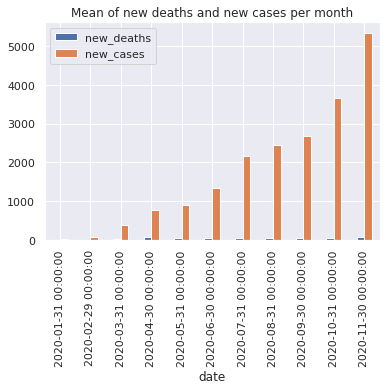

In [158]:
#calculations of new_deaths and new_cases per day
#date to datetime convertion
data.index = pd.to_datetime(data['date'],format='%y-%m-%d',infer_datetime_format=True)
#Start from January 2020
data = data[data.date != '2019-12-31']
data2=data[['date','new_deaths','new_cases']].dropna()

#sum of new_cases and new_deaths per day
sums_of_cases_and_deaths=data.groupby(pd.Grouper(freq='D')).sum()
#mean of new-cases and new_deaths pes month

data2.groupby(pd.Grouper(freq='M')).mean().plot(kind='bar',title="Mean of new deaths and new cases per month")
plt.show()


Παρατηρήσεις:

-Τα κρούσματα έχουν μια ξεκάθαρα ανοδική πορεία και είναι πολυπληθέστερα σε σχέση με τους θανάτους.Έκρηξη σημειώνεται τον Οκτώβριο και τον Νοέμβριο.

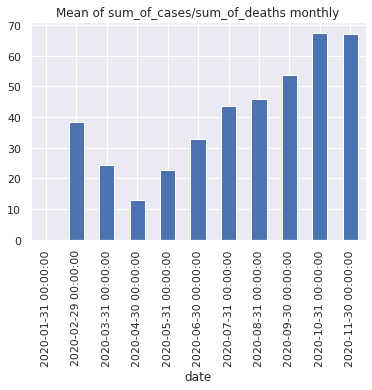

In [159]:
cases_div_deaths=(sums_of_cases_and_deaths.new_cases/sums_of_cases_and_deaths.new_deaths).groupby(pd.Grouper(freq='M')).mean().plot(kind='bar',title="Mean of sum_of_cases/sum_of_deaths monthly")


<AxesSubplot:xlabel='date', ylabel='new_cases'>

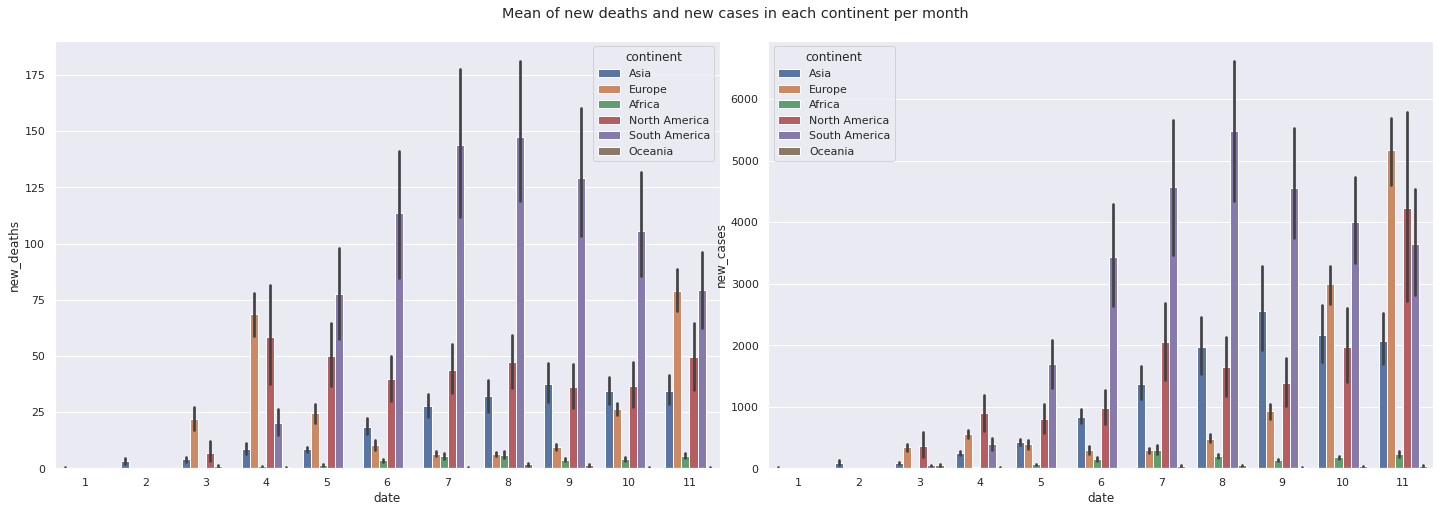

In [160]:
data.index = pd.to_datetime(data['date'],format='%y-%m-%d',infer_datetime_format=True)
#Start from January 2020
data = data[data.date != '2019-12-31']
data1=data[['continent','new_deaths','new_cases']].dropna()
data1.groupby(['continent',data1.index.month]).mean()

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(20,7))
plt.suptitle('Mean of new deaths and new cases in each continent per month')
fig.tight_layout()
plt.subplot(1, 2, 1)
sns.barplot(data=data1,x=data1.index.month,y=data1.new_deaths,hue='continent')
plt.subplot(1, 2, 2)  
sns.barplot(data=data1,x=data1.index.month,y=data1.new_cases,hue='continent')


Παρατηρήσεις:

-Η Νότια Αμερική έχει του περισσότερους νέους θανάτους,που αντικατοπτρίζει και το βιωτικό επίπεδο του μεγαλύτερου μέρους του πληθυσμού.

-Η Ασία συγκρητικά με το πληθυσμό της,έχει υπό έλεγχο την πανδημία.

-Εντυπωσιακή είναι η σύγκριση της Ωκεανίας με τις υπόλοιπες ηπείρους σε νέα κρούσματα και θανάτους.Η κατάσταση της ηπείρου είναι άριστη.

-Υπάρχει μια πολύ μεγάλη συγκέντρωση κρουσμάτων κατά τους 2 τελευταίους μήνες στην Ευρώπη και στην Αμερική.

-Η κορύφωση θανάτων συνολικά ήταν τον Αύγουστο και των κρουσμάτων τον Αύγουστο και τον Νοέμβριο.

Part D

In [161]:

state_voting = pd.read_csv("state-voting.csv")
usa_covid_data = pd.read_csv("united_states_covid19_cases_and_deaths_by_state.csv")
usa_covid_data.rename(columns = {'State/Territory' : 'State'}, inplace = True)

#Sum of New York State and New York City data made on csv file
usa_covid_data = usa_covid_data.dropna(axis=1)
covid_voting_usa_data = usa_covid_data.merge(state_voting, on='State')
covid_voting_usa_data.to_csv("covid_voting_usa_data.csv", index=False)
#Columns like 'Cases per 100000 in last 7 days' don't include because they're not representative of that period of voting.
covid_voting_usa_data=covid_voting_usa_data[['State','Total Deaths','Total Cases','Case Rate per 100000','Death Rate per 100000','Vote']].dropna()
covid_voting_usa_data.groupby(['State','Total Deaths','Total Cases','Vote']).sum().head()






Case Rate per 100000  \
State      Total Deaths Total Cases Vote                         
Alabama    3572         242874      R                     4969   
Alaska     118          29554       R                     4008   
Arizona    6588         318638      D                     4443   
Arkansas   2436         153677      R                     5099   
California 19033        1171324     D                     2961   

                                          Death Rate per 100000  
State      Total Deaths Total Cases Vote                         
Alabama    3572         242874      R                        73  
Alaska     118          29554       R                        16  
Arizona    6588         318638      D                        91  
Arkansas   2436         153677      R                        80  
California 19033        1171324     D                        48

<AxesSubplot:xlabel='Case Rate per 100000', ylabel='State'>

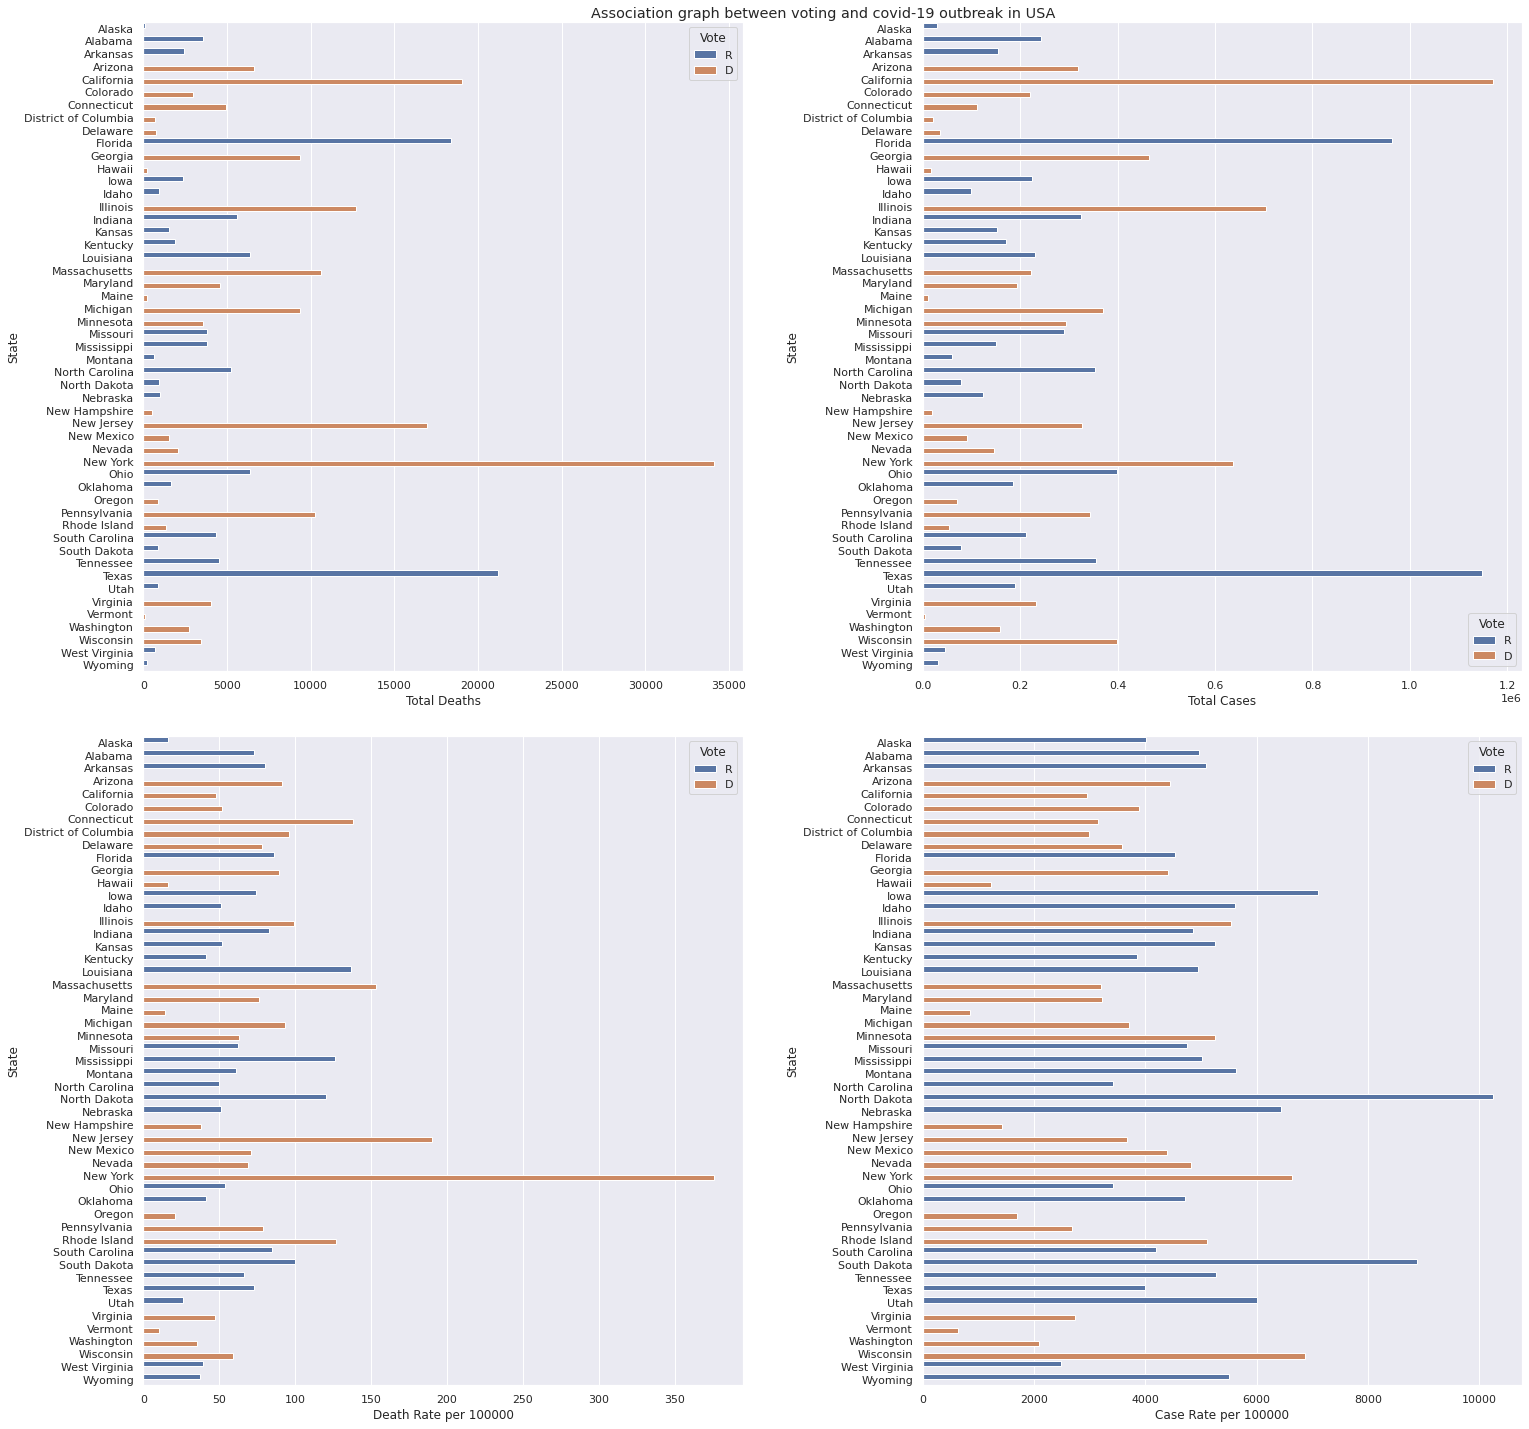

In [162]:
#Association graph between voting and covid-19 outbreak in USA by Total Deaths,Total Cases,Death Rate per 100000,Case Rate per 100000 indicators
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(20,20))
plt.suptitle('Association graph between voting and covid-19 outbreak in USA')
fig.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.3)
plt.subplot(2, 2, 1)
sns.barplot(data=covid_voting_usa_data,x=covid_voting_usa_data['Total Deaths'],y=covid_voting_usa_data['State'],hue='Vote')
plt.subplot(2, 2, 2)
sns.barplot(data=covid_voting_usa_data,x=covid_voting_usa_data['Total Cases'],y=covid_voting_usa_data['State'],hue='Vote')
plt.subplot(2, 2, 3)
sns.barplot(data=covid_voting_usa_data,x=covid_voting_usa_data['Death Rate per 100000'],y=covid_voting_usa_data['State'],hue='Vote')
plt.subplot(2, 2, 4)
sns.barplot(data=covid_voting_usa_data,x=covid_voting_usa_data['Case Rate per 100000'],y=covid_voting_usa_data['State'],hue='Vote')

Μπλε χρώμα:Ρεπουμπλικανοί

Πορτοκαλί:Δημοκρατικοί

Παρατηρήσεις διαγράμματων ψηφοφόρων σε σχέση με την πανδημία:

-Οι περισσότερες πολιτείες που κατέγραψαν πολλούς θανάτους άρα και έμειναν δυσαρεστημένες από την αντιμετώπιση της πανδημίας από την κυβέρνηση, ψήφισαν Δημοκρατικό κόμμα.

-Οι θάνατοι ανά εκατό χιλιάδες δεν δείχνουν σαφές συμπέρασμα για την συσχέτιση εκλογών και πανδημίας

-Τα κρούσματα ανά εκατό χιλιάδες δείχνουν πως οι πολιτείες με πιο μικρό ποσοστό ψήφισαν Δημοκρατικούς κάτι που δείχνει ίσως,μια πιο συντηρητική στάση απέναντι στην πανδημία,αλλά και την ατομική ευθύνη που οι Ρεπουμπλικανοί,δεν υπερασπίστηκαν σθεναρά.

-Όμοια για τα συνολικά κρούσματα σε αυτές τις πολιτείες.